In [1]:
# For data generation
import sys
# !{sys.executable} -m pip install matplotlib --upgrade
import shutil
import os
import numpy as np
from glob import glob
import re
import pandas as pd
import pickle
#random
from time import perf_counter

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV


#Plotting
import seaborn as sns
sns.set_style()
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200

import warnings
# warnings.filterwarnings("ignore", category=np.DeprecationWarning) 


from tqdm.auto import tqdm
# from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
with open(os.path.join(os.path.expanduser('~'),'DDCASPT2/drop.txt'),'r') as d:
    dropfeat = [i.replace('\n','') for i in d.readlines()]

In [3]:
with open('test_ind.pickle', 'rb') as handle:
    test_ind = pickle.load(handle)

with open('train_ind.pickle', 'rb') as handle:
    train_ind = pickle.load(handle)
    
print(len(train_ind),len(test_ind))    


70 30


/tmp/ipykernel_10401/2691449218.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  test_ind = pickle.load(handle)
/tmp/ipykernel_10401/2691449218.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the 

In [4]:
len(train_ind)*len(glob('H*')),len(test_ind)*len(glob('H*'))

(700, 300)

In [5]:
len(train_ind)*len([i for i in glob('H*') if '12' not in i]),len(test_ind)*len([i for i in glob('H*') if '12' not in i])

(630, 270)

In [6]:
train = []
test = []



recover_train = []
recover_test = []

traincnt = 0
testcnt = 0
for i in sorted(glob('H*')):
    print(i)
    try:
        if int(i.split('_')[0].strip('H'))<=12 and os.path.isdir(i):
            for j in glob(os.path.join(i,'H*')):
                for k in train_ind:
                    if f"{k:.2f}" in j:
                        traindf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                        train.append(traindf)
                        recover_train.append((i,f"{k:.2f}",traincnt,len(traindf)))
                        traincnt+=1
                        
                for l in test_ind:
                    if f"{l:.2f}" in j:
                        testdf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                        test.append(testdf)                    
                        recover_test.append((i,f"{l:.2f}",testcnt,len(testdf)))
                        testcnt+=1
    except:
        pass

H10_chain
H12_chain
H14_chain
H2_chain
H2n_VDZP_params.xlsx
H2n_params.xlsx
H4_chain
H6_chain
H8_chain
Hn_SHAP.xlsx


In [7]:
rename = {'h$_{qq}^{0}$':'h$_{q}$',
'$(F_{q})_{0}$':'$F_{q}$',
'$(F_{q}^{\\text{SCF}})_{0}$':'$F_{q}^{\\text{SCF}}$',
'$(\\eta_{q})_{0}$':'$\\eta_{q}$',
'$(\\omega_{q})_{0}$':'$\\omega_{q}$',
'$(\\eta_{s})_{0}$':'$\\eta_{s}$',
'h$_{ss}^{0}$':'h$_{s}$',
'$(F_{s}^{\\text{SCF}})_{0}$':'$F_{s}^{\\text{SCF}}$',
'$(F_{s})_{0}$':'$F_{s}$',
'$(\\omega_{s})_{0}$':'$\\omega_{s}$',
'$(\\langle ss \\vert ss \\rangle)_{0}$':"$\\langle ss \\vert ss \\rangle$",
'$(\\langle qq \\vert qq \\rangle)_{0}$':"$\langle qq \\vert qq \\rangle$",
'h$_{pp}^{0}$': '(h$_{p}$)$_{0}$',
'h$_{pp}^{1}$': '(h$_{p}$)$_{1}$',
'h$_{pp}^{2}$': '(h$_{p}$)$_{2}$',
'h$_{pp}^{3}$': '(h$_{p}$)$_{3}$',
'h$_{rr}^{0}$': '(h$_{r}$)$_{0}$',
'h$_{rr}^{1}$': '(h$_{r}$)$_{1}$',
'h$_{rr}^{2}$': '(h$_{r}$)$_{2}$',
'h$_{rr}^{3}$': '(h$_{r}$)$_{3}$',
'h$_{pq}^{0}$':'(h$_{pq}$)$_{0}$',
'h$_{pq}^{1}$':'(h$_{pq}$)$_{1}$',
'h$_{pq}^{2}$':'(h$_{pq}$)$_{2}$',
'h$_{pq}^{3}$':'(h$_{pq}$)$_{3}$',
'h$_{pr}^{0}$':'(h$_{pr}$)$_{0}$',
'h$_{pr}^{1}$':'(h$_{pr}$)$_{1}$',
'h$_{pr}^{2}$':'(h$_{pr}$)$_{2}$',
'h$_{pr}^{3}$':'(h$_{pr}$)$_{3}$',
'h$_{rs}^{0}$':'(h$_{rs}$)$_{0}$',
'h$_{rs}^{1}$':'(h$_{rs}$)$_{1}$',
'h$_{rs}^{2}$':'(h$_{rs}$)$_{2}$',
'h$_{rs}^{3}$':'(h$_{rs}$)$_{3}$',
'typ_0':'$type_0$',
'typ_1':'$type_1$',
'typ_2':'$type_2$',
'typ_3':'$type_3$'}

In [8]:
train_df = pd.concat(train).drop(columns=dropfeat).rename(columns=rename)
test_df = pd.concat(test).drop(columns=dropfeat).rename(columns=rename)

In [9]:
sorted(train_df.columns)

['$(F_{p})_{0}$',
 '$(F_{p})_{1}$',
 '$(F_{p})_{2}$',
 '$(F_{p})_{3}$',
 '$(F_{p}^{\\text{SCF}})_{0}$',
 '$(F_{p}^{\\text{SCF}})_{1}$',
 '$(F_{p}^{\\text{SCF}})_{2}$',
 '$(F_{p}^{\\text{SCF}})_{3}$',
 '$(F_{r})_{0}$',
 '$(F_{r})_{1}$',
 '$(F_{r})_{2}$',
 '$(F_{r})_{3}$',
 '$(F_{r}^{\\text{SCF}})_{0}$',
 '$(F_{r}^{\\text{SCF}})_{1}$',
 '$(F_{r}^{\\text{SCF}})_{2}$',
 '$(F_{r}^{\\text{SCF}})_{3}$',
 '$(\\eta_{p})_{0}$',
 '$(\\eta_{p})_{1}$',
 '$(\\eta_{p})_{2}$',
 '$(\\eta_{p})_{3}$',
 '$(\\eta_{r})_{0}$',
 '$(\\eta_{r})_{1}$',
 '$(\\eta_{r})_{2}$',
 '$(\\eta_{r})_{3}$',
 '$(\\langle pp \\vert pp \\rangle)_{0}$',
 '$(\\langle pp \\vert pp \\rangle)_{1}$',
 '$(\\langle pp \\vert pp \\rangle)_{2}$',
 '$(\\langle pp \\vert pp \\rangle)_{3}$',
 '$(\\langle pq \\vert pq \\rangle)_{0}$',
 '$(\\langle pq \\vert pq \\rangle)_{1}$',
 '$(\\langle pq \\vert pq \\rangle)_{2}$',
 '$(\\langle pq \\vert pq \\rangle)_{3}$',
 '$(\\langle pq \\vert qp \\rangle)_{0}$',
 '$(\\langle pq \\vert qp \\rangle)_{

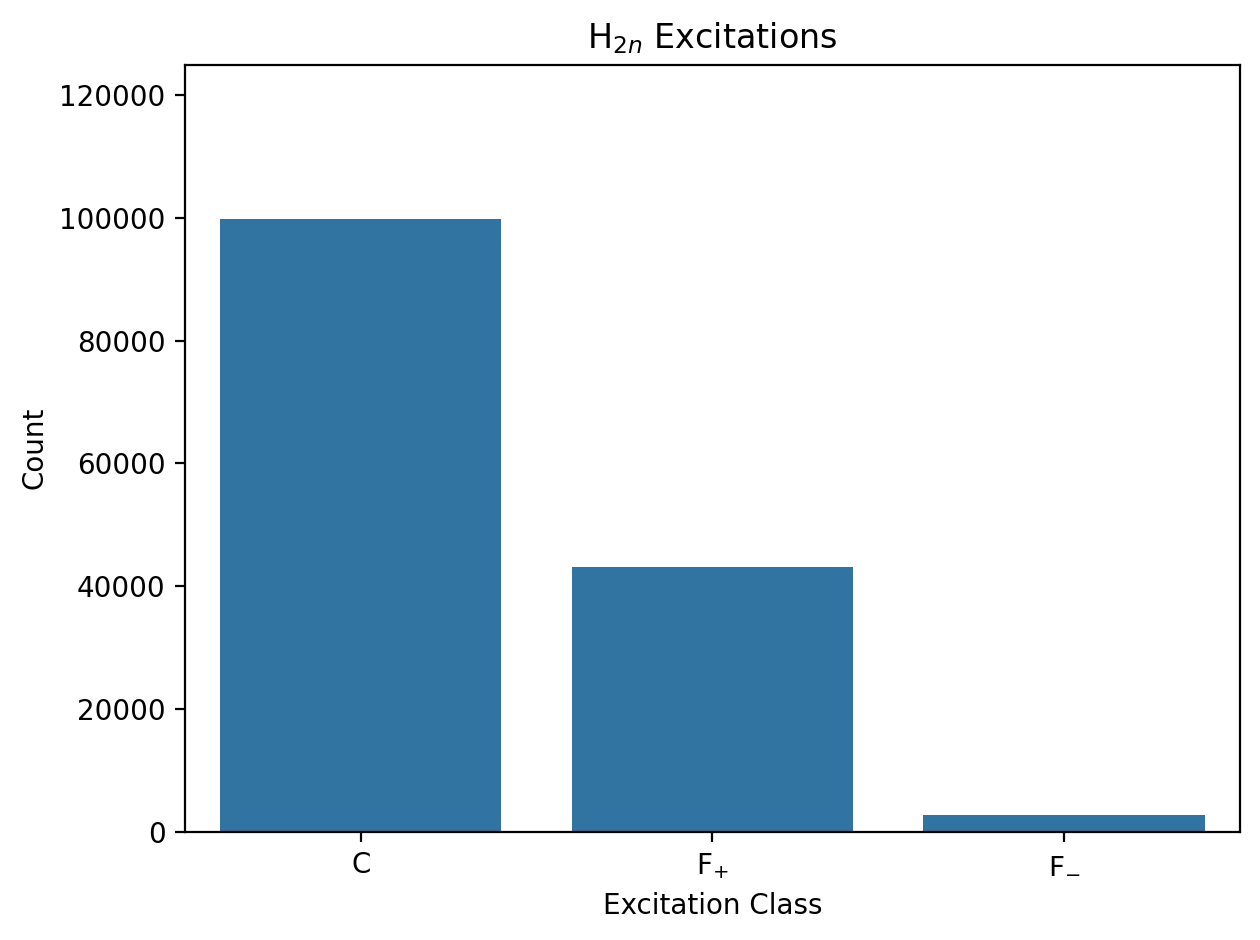

In [10]:
counttypes=pd.concat([pd.concat([train_df,test_df])[i].value_counts() for i in train_df.columns if 'typ' in i],axis=1).T.sum(axis=0).sort_index()
counttypes.index=[{1:"A", 2:"B$_{+}$", 3:"B$_{-}$", 4:"C", 5:"D", 6:"E$_{+}$", 7:"E$_{-}$", 8:"F$_{+}$", 9:"F$_{-}$", 10:"G$_{+}$", 11:"G$_{-}$", 12:"H$_{+}$", 13:"H$_{-}$"}[t] for t in counttypes.index+1]
sns.barplot(data=counttypes.reset_index(),x='index',y=0,color=sns.color_palette('Paired')[1])
plt.ylabel('Count')
plt.xlabel('Excitation Class')
plt.ylim(0,125e3)
plt.title('H$_{2n}$ Excitations')
plt.tight_layout()
plt.savefig('images/excitation_barplot.png',dpi=300,bbox_inches='tight')
plt.show()

In [11]:
(counttypes/counttypes.sum()).round(2)

C          0.69
F$_{+}$    0.30
F$_{-}$    0.02
dtype: float64

In [12]:
X_train = train_df.drop(columns=['Pair_Energies']).values
X_test = test_df.drop(columns=['Pair_Energies']).values

y_train = train_df['Pair_Energies'].values
y_test = test_df['Pair_Energies'].values

In [13]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
from xgboost import XGBRegressor

kwargs = dict(pd.read_excel("H2n_params.xlsx").values)
model=XGBRegressor(**kwargs)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
print(f"RMSE (mEh): {root_mean_squared_error(y_train,y_pred_train)*1e3:.4f},{root_mean_squared_error(y_test,y_pred_test)*1e3:.4f}")

# params = {'max_depth': [1, 10, 100],
#           'n_estimators': [100, 500, 1000],
#           'reg_lambda': [1e-6, 1e-3,1e-1],
#           'reg_alpha': [1e-6, 1e-3,1e-1]}

# model = XGBRegressor()
# grid = GridSearchCV(estimator=model, 
#                    param_grid=params,
#                    scoring='r2', 
#                    verbose=0,n_jobs=12).fit(X_train,y_train)


# model=grid.best_estimator_
# y_pred_train=model.predict(X_train)
# y_pred_test=model.predict(X_test)
# print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
# print(f"RMSE (mEh): {root_mean_squared_error(y_train,y_pred_train)*1e3:.4f},{root_mean_squared_error(y_test,y_pred_test)*1e3:.4f}")
# pd.DataFrame.from_dict(model.get_params(),orient='index').dropna().to_excel("H2n_params.xlsx")

R2: 0.9926,0.9826
RMSE (mEh): 0.1004,0.1625


In [15]:
pd.DataFrame.from_dict(model.get_params(),orient='index').dropna().to_excel("H2n_VDZP_params.xlsx")

In [16]:
min(y_train)*1e3

np.float64(-11.8791404)

In [17]:
max(y_train)*1e3

np.float64(2.0388425)

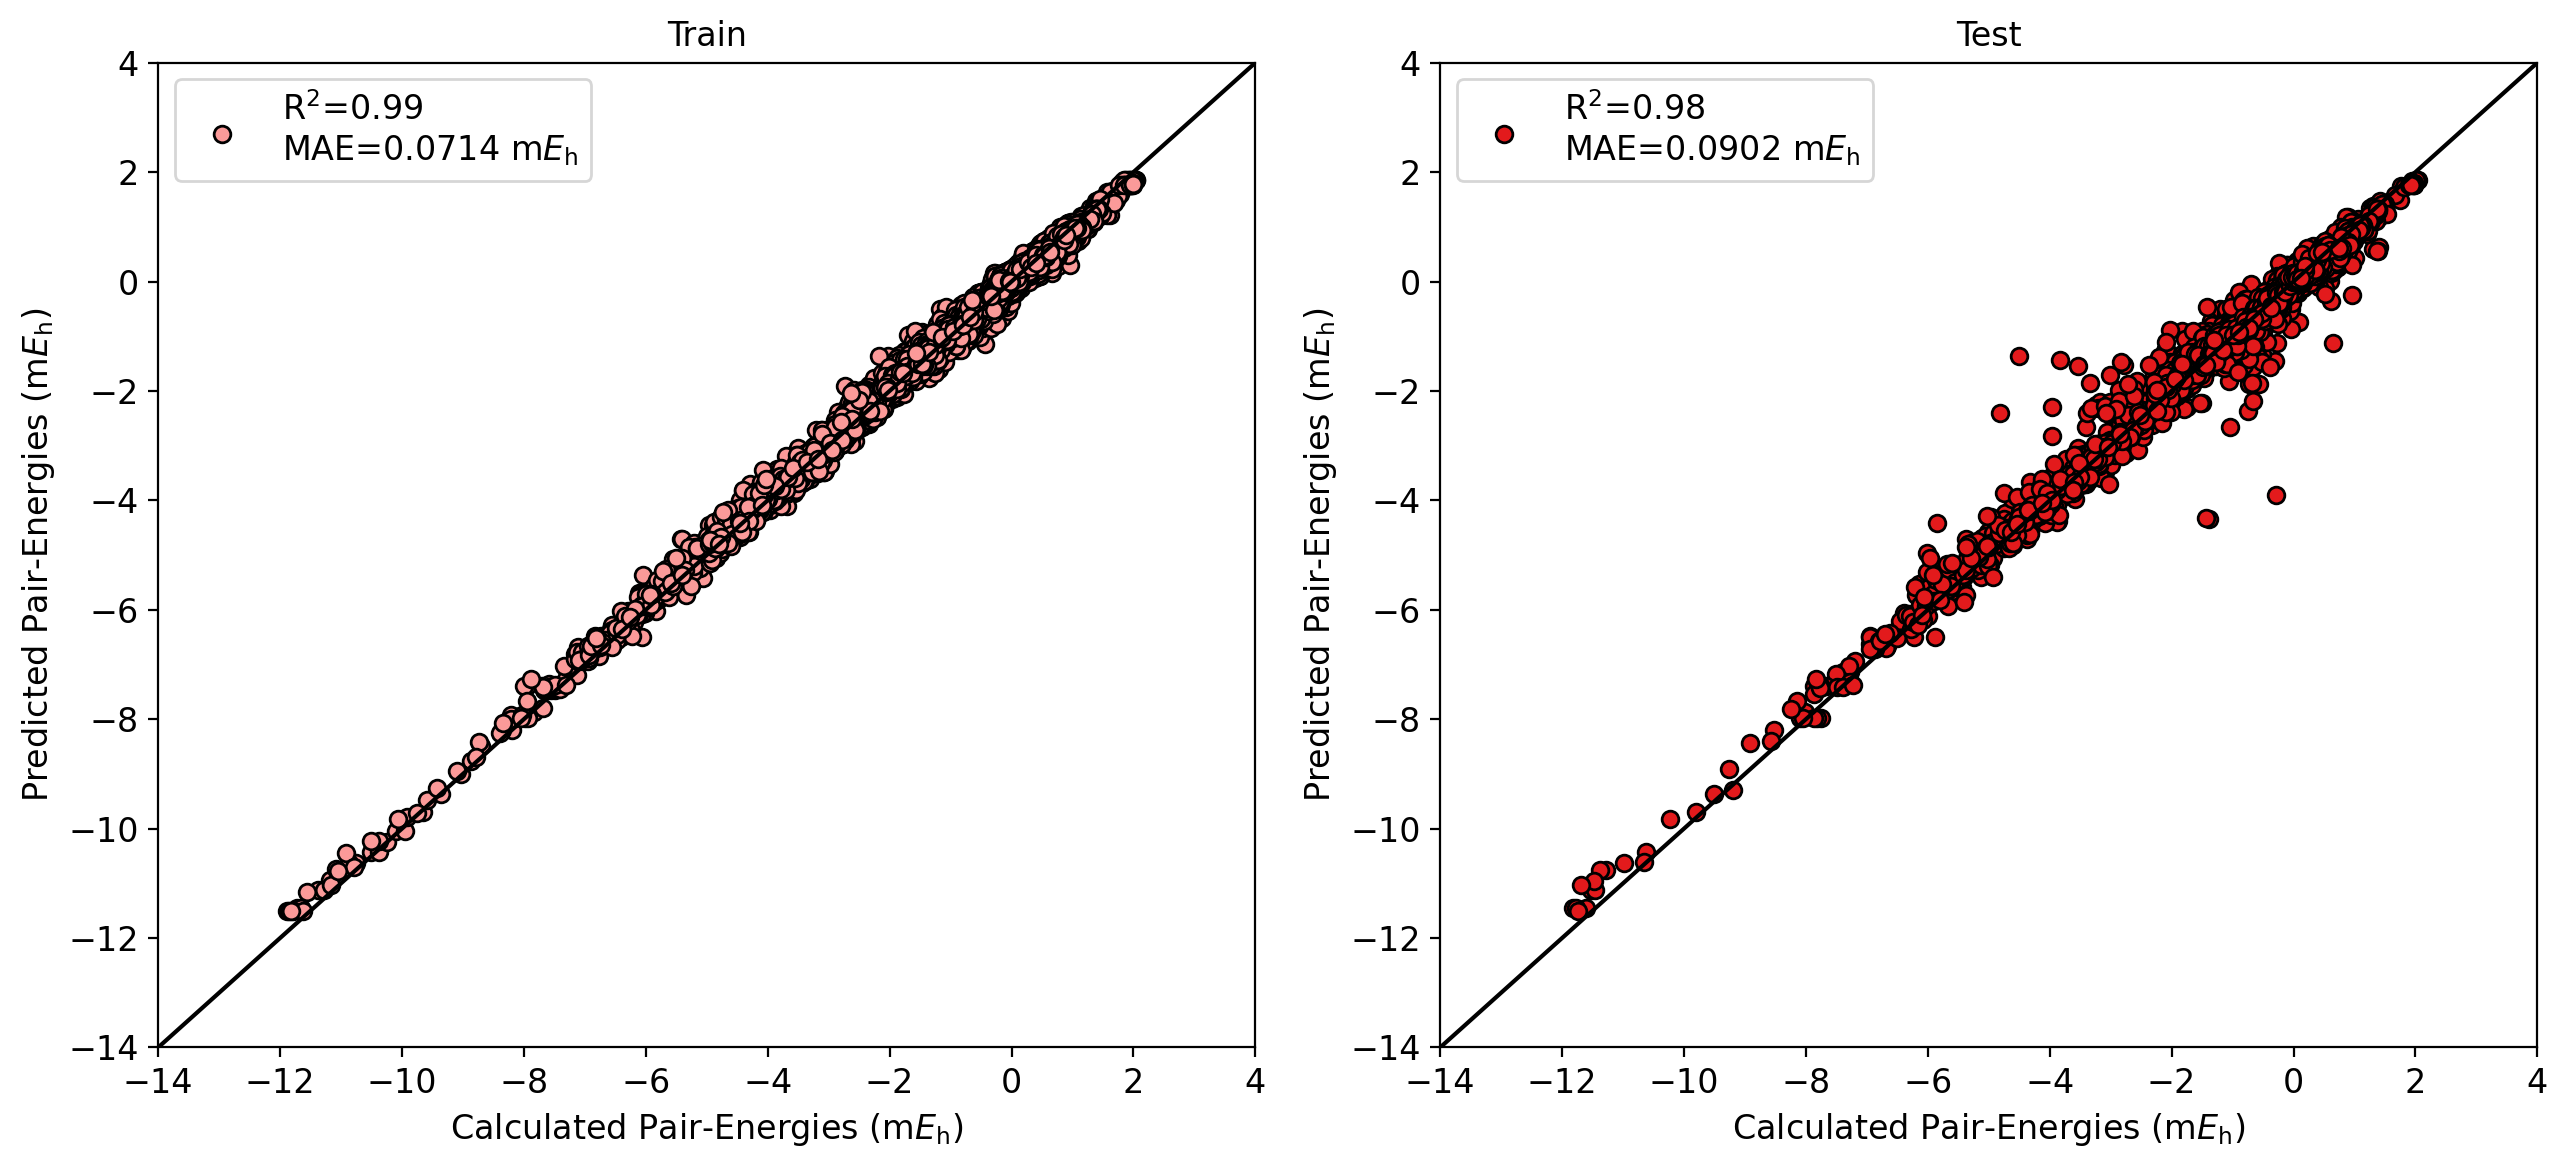

In [18]:
pal = sns.color_palette("Paired")
font=12
plt.rc('font', size=font)          # controls default text sizes
plt.rc('axes', titlesize=font)     # fontsize of the axes title
plt.rc('axes', labelsize=font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font)    # fontsize of the tick labels
plt.rc('legend', fontsize=font)    # legend fontsize
plt.rc('figure', titlesize=font)  # fontsize of the figure title
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,6))
scale=1
ax1.set_title('Train')
ax1.scatter(1e3*y_train,1e3*y_pred_train,label="R$^{2}$="+f'{r2_score(y_train,y_pred_train):.2f}\nMAE={1e3*mean_absolute_error(y_train,y_pred_train):.4f}'+" m$E_{\mathrm{h}}$",color=pal[4],edgecolors='k')
ax1.plot(range(-30,30),range(-30,30),'k-')
ax1.set_xlim(-14,4)
ax1.set_ylim(-14,4)
ax1.set_xlabel('Calculated Pair-Energies (m$E_{\mathrm{h}}$)')
ax1.set_ylabel('Predicted Pair-Energies (m$E_{\mathrm{h}}$)')
ax1.legend()


ax2.set_title('Test')
ax2.scatter(1e3*y_test,1e3*y_pred_test,label="R$^{2}$="+f'{r2_score(y_test,y_pred_test):.2f}\nMAE={1e3*mean_absolute_error(y_test,y_pred_test):.4f}'+" m$E_{\mathrm{h}}$",color=pal[5],edgecolors='k')
ax2.plot(range(-30,30),range(-30,30),'k-')
ax2.set_xlim(-14,4)
ax2.set_ylim(-14,4)
ax2.set_xlabel('Calculated Pair-Energies (m$E_{\mathrm{h}}$)')
ax2.set_ylabel('Predicted Pair-Energies (m$E_{\mathrm{h}}$)')
ax2.legend()

plt.tight_layout()
plt.savefig('images/H2n_parity.png',dpi=300,bbox_inches='tight')
plt.show()

In [19]:
testcntrcvr = 0
recover_test_list = []
recover_test_E2 = []
for i,j,k,l in recover_test:
    init_test = testcntrcvr
    testcntrcvr+=l
    recover_test_list.append((i.split("_")[0],j,y_test[init_test:testcntrcvr],y_pred_test[init_test:testcntrcvr]))
    recover_test_E2.append((i.split("_")[0],j,np.sum(y_test[init_test:testcntrcvr]),np.sum(y_pred_test[init_test:testcntrcvr])))


traincntrcvr = 0
recover_train_list = []
recover_train_E2 = []
for i,j,k,l in recover_train:
    init_train = traincntrcvr
    traincntrcvr+=l
    recover_train_list.append((i.split("_")[0],j,y_train[init_train:traincntrcvr],y_pred_train[init_train:traincntrcvr]))
    recover_train_E2.append((i.split("_")[0],j,np.sum(y_train[init_train:traincntrcvr]),np.sum(y_pred_train[init_train:traincntrcvr])))

In [20]:
traincorrE2 = pd.DataFrame(recover_train_E2).rename(columns={0:'H$_{2n}$',1:'Radius ($\AA$)',2:'E$_{2}^{\text{Calculated}}$',3:'E$_{2}^{\text{Predicted}}$'})
#.astype({'H$_{2n}$':str,'Radius ($\AA$)':float,'E$_{2}^{\text{Calculated}}$':float,'E$_{2}^{\text{Predicted}}$':float})
testcorrE2 = pd.DataFrame(recover_test_E2).rename(columns={0:'H$_{2n}$',1:'Radius ($\AA$)',2:'E$_{2}^{\text{Calculated}}$',3:'E$_{2}^{\text{Predicted}}$'})
#.astype({'H$_{2n}$':str,'Radius ($\AA$)':float,'E$_{2}^{\text{Calculated}}$':float,'E$_{2}^{\text{Predicted}}$':float})


traincorrE2['CASPT2_E']=np.zeros(len(traincorrE2))
traincorrE2['CASSCF_E']=np.zeros(len(traincorrE2))
traincorrE2['E2']=np.zeros(len(traincorrE2))

traincorrE2.index = ["_".join((u,v)) for u,v in traincorrE2[['H$_{2n}$','Radius ($\AA$)']].values]

for i in traincorrE2.index:
    hn, r = i.split('_')
    energy_df = pd.read_excel(f"{hn}_chain/{hn}_{r}/{hn}_{r}_energies.xlsx",index_col=0)
    traincorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
    traincorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values
    # traincorrE2.loc[i,'E2']=energy_df.loc['E2'].values

traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'] = traincorrE2['CASSCF_E']+traincorrE2['E$_{2}^{\text{Predicted}}$']

traincorrE2.rename(columns = {'CASPT2_E':'E$_{\text{CASPT2}}^{\text{Calculated}}$','CASSCF_E':'E$_{\text{CASSCF}}^{\text{Calculated}}$'},inplace=True)


testcorrE2['CASPT2_E']=np.zeros(len(testcorrE2))
testcorrE2['CASSCF_E']=np.zeros(len(testcorrE2))
testcorrE2['E2']=np.zeros(len(testcorrE2))

testcorrE2.index = ["_".join((u,v)) for u,v in testcorrE2[['H$_{2n}$','Radius ($\AA$)']].values]

for i in testcorrE2.index:
    hn, r = i.split('_')
    energy_df = pd.read_excel(f"{hn}_chain/{hn}_{r}/{hn}_{r}_energies.xlsx",index_col=0)
    testcorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
    testcorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values
    # testcorrE2.loc[i,'E2']=energy_df.loc['E2'].values

testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'] = testcorrE2['CASSCF_E']+testcorrE2['E$_{2}^{\text{Predicted}}$']

testcorrE2.rename(columns = {'CASPT2_E':'E$_{\text{CASPT2}}^{\text{Calculated}}$','CASSCF_E':'E$_{\text{CASSCF}}^{\text{Calculated}}$'},inplace=True)

In [21]:
traincaspt2melt = traincorrE2.melt(id_vars=['H$_{2n}$','Radius ($\AA$)'], value_vars=['E$_{\text{CASPT2}}^{\text{Calculated}}$','E$_{\text{CASPT2}}^{\text{Predicted}}$']).astype({'Radius ($\AA$)':float,'value':float})
testcaspt2melt = testcorrE2.melt(id_vars=['H$_{2n}$','Radius ($\AA$)'], value_vars=['E$_{\text{CASPT2}}^{\text{Calculated}}$','E$_{\text{CASPT2}}^{\text{Predicted}}$']).astype({'Radius ($\AA$)':float,'value':float})

In [22]:
trueE2=pd.concat([traincorrE2,testcorrE2]).astype({'Radius ($\AA$)':float,'E$_{\text{CASPT2}}^{\text{Calculated}}$':float})

In [23]:
mean_absolute_error(testcorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

np.float64(1.0749031665142728)

In [24]:
mean_absolute_error(traincorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

np.float64(0.5752539754040886)

In [25]:
f"{0.5752539754040886:.4f}",f"{1.0749031665142728:.4f}"

('0.5753', '1.0749')

In [26]:
pairedcp=sns.color_palette('Paired')

In [27]:
try:
    os.mkdir('images')
except:
    print("./images exists")

./images exists


In [28]:
traincorrE2.max()

H$_{2n}$                                         H8
Radius ($\AA$)                                 2.98
E$_{2}^{\text{Calculated}}$               -0.000112
E$_{2}^{\text{Predicted}}$                -0.000069
E$_{\text{CASPT2}}^{\text{Calculated}}$   -0.996947
E$_{\text{CASSCF}}^{\text{Calculated}}$   -0.996835
E2                                              0.0
E$_{\text{CASPT2}}^{\text{Predicted}}$    -0.997043
dtype: object

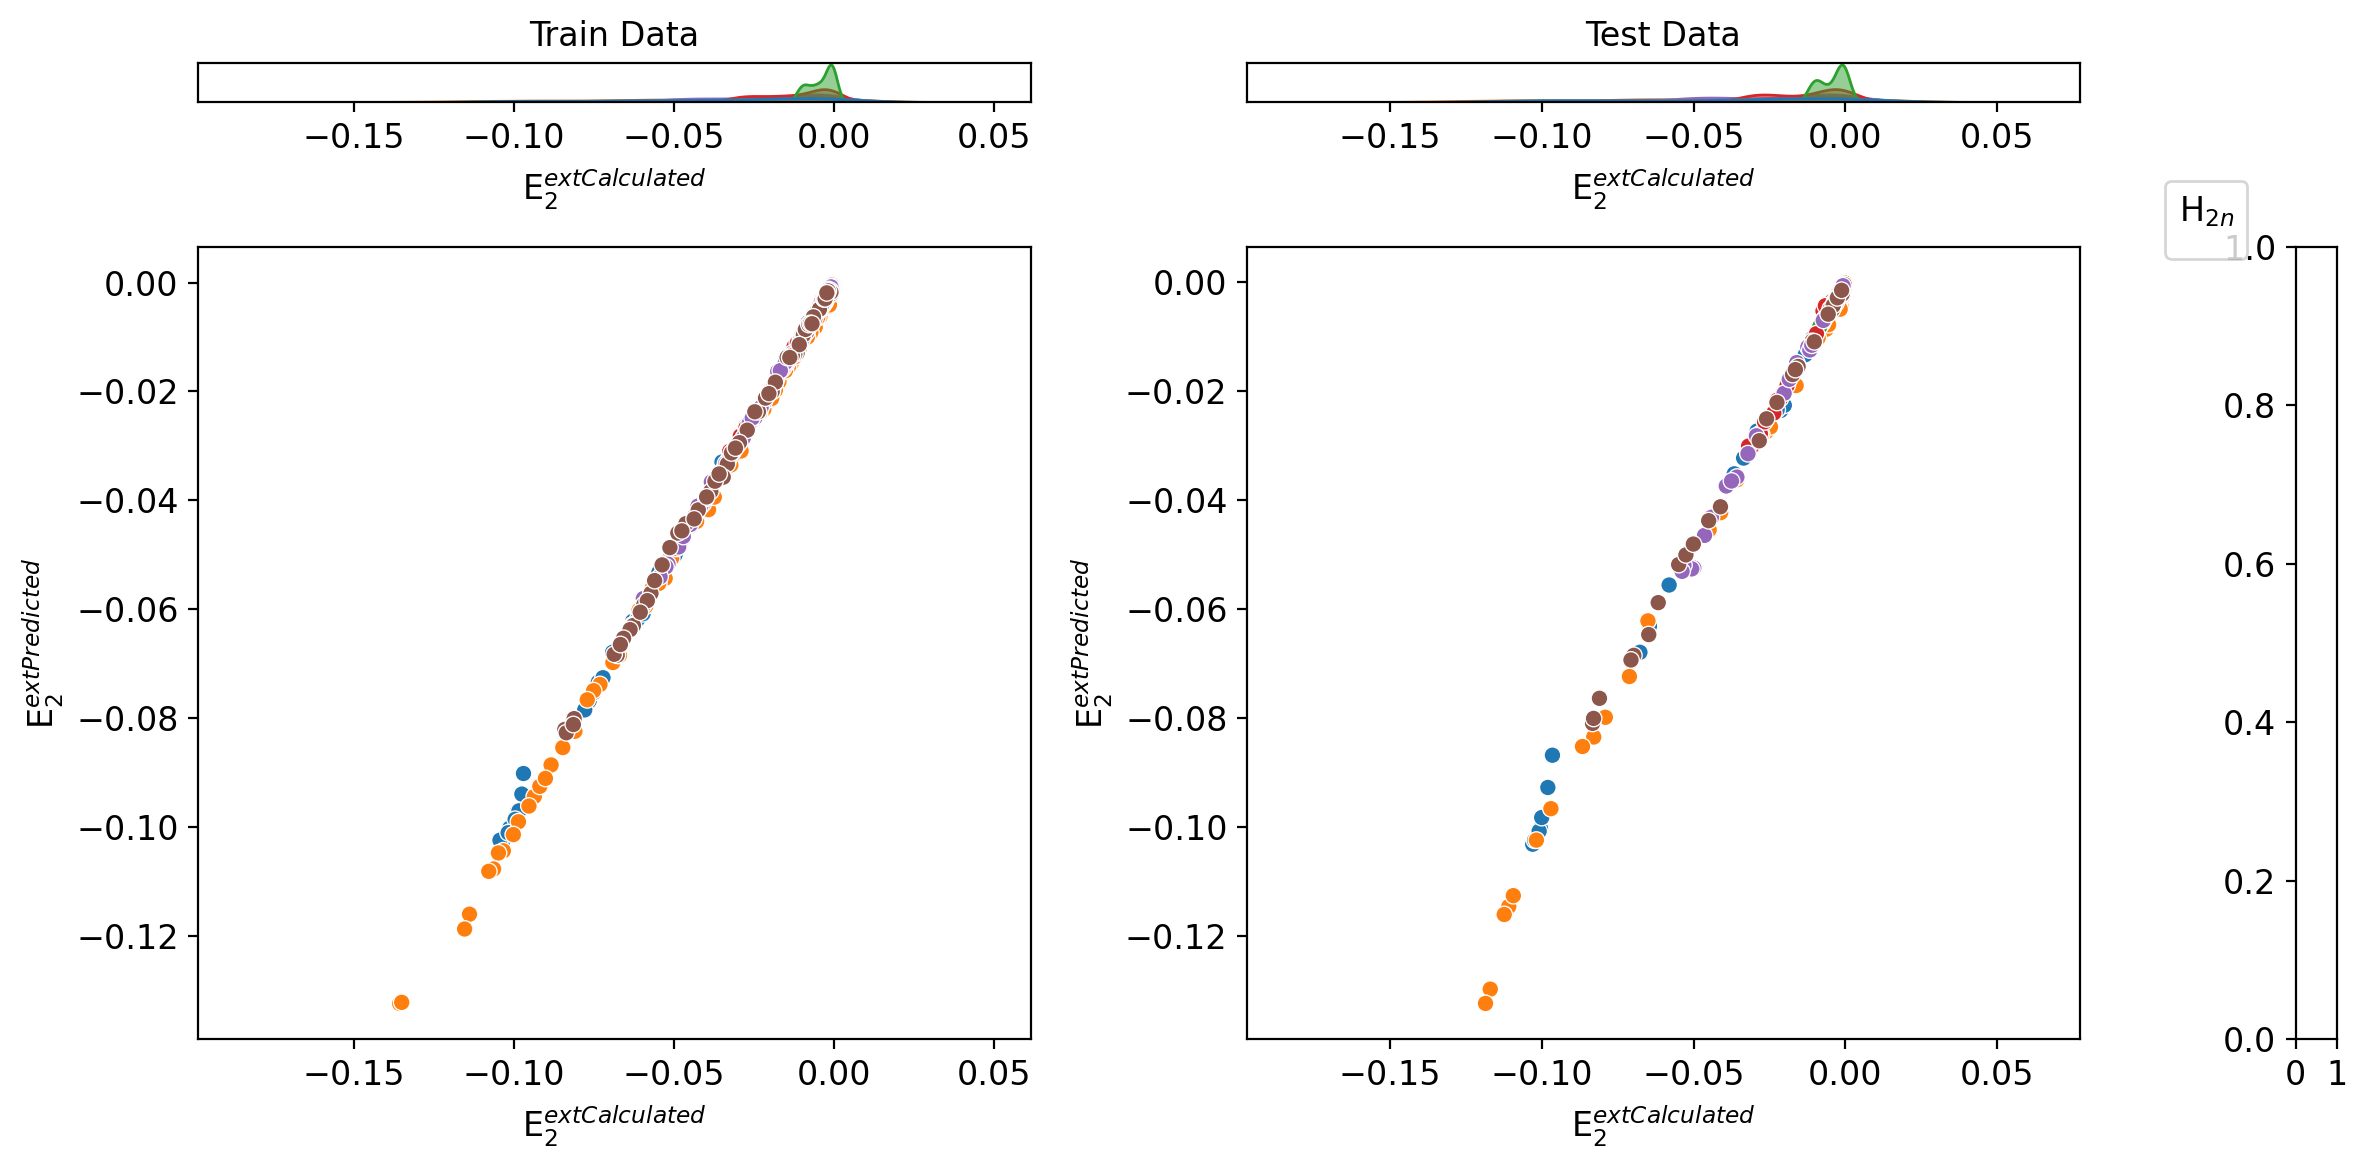

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 3, width_ratios=[4, 4, 0.2], height_ratios=[0.2, 4], figure=fig)

# Main scatter plot axes
ax_scatter1 = fig.add_subplot(gs[1, 0])
ax_scatter2 = fig.add_subplot(gs[1, 1])

# KDE axes for Calculated values
ax_kde1 = fig.add_subplot(gs[0, 0], sharex=ax_scatter1)
ax_kde2 = fig.add_subplot(gs[0, 1], sharex=ax_scatter2)

# Colorbar axis
cbar_ax = fig.add_subplot(gs[1, 2])

# Train data scatter plot
scatter1 = sns.scatterplot(
    data=traincorrE2, 
    x='E$_{2}^{\text{Calculated}}$', 
    y='E$_{2}^{\text{Predicted}}$', 
    hue='H$_{2n}$', 
    ax=ax_scatter1, 
    legend=False
)

# Test data scatter plot
scatter2 = sns.scatterplot(
    data=testcorrE2, 
    x='E$_{2}^{\text{Calculated}}$', 
    y='E$_{2}^{\text{Predicted}}$', 
    hue='H$_{2n}$', 
    ax=ax_scatter2, 
    legend=False
)

# Train data KDE plot for Calculated values
sns.kdeplot(
    data=traincorrE2, 
    x='E$_{2}^{\text{Calculated}}$', 
    hue='H$_{2n}$', 
    ax=ax_kde1, 
    fill=True, 
    alpha=0.5, 
    legend=False
)

# Test data KDE plot for Calculated values
sns.kdeplot(
    data=testcorrE2, 
    x='E$_{2}^{\text{Calculated}}$', 
    hue='H$_{2n}$', 
    ax=ax_kde2, 
    fill=True, 
    alpha=0.5, 
    legend=False
)

# Adjust labels and titles
ax_kde1.set_title("Train Data")
ax_kde2.set_title("Test Data")
ax_kde1.set_ylabel("")  # Remove unnecessary ylabel
ax_kde2.set_ylabel("")
ax_kde1.tick_params(axis='y', left=False, labelleft=False)  # Remove y-ticks
ax_kde2.tick_params(axis='y', left=False, labelleft=False)

# Add a single legend
handles, labels = scatter2.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", title="H$_{2n}$", bbox_to_anchor=(0.95, 0.85))

# Tight layout and show
plt.tight_layout()
plt.show()


In [30]:
allcorr = pd.concat([traincorrE2,testcorrE2])

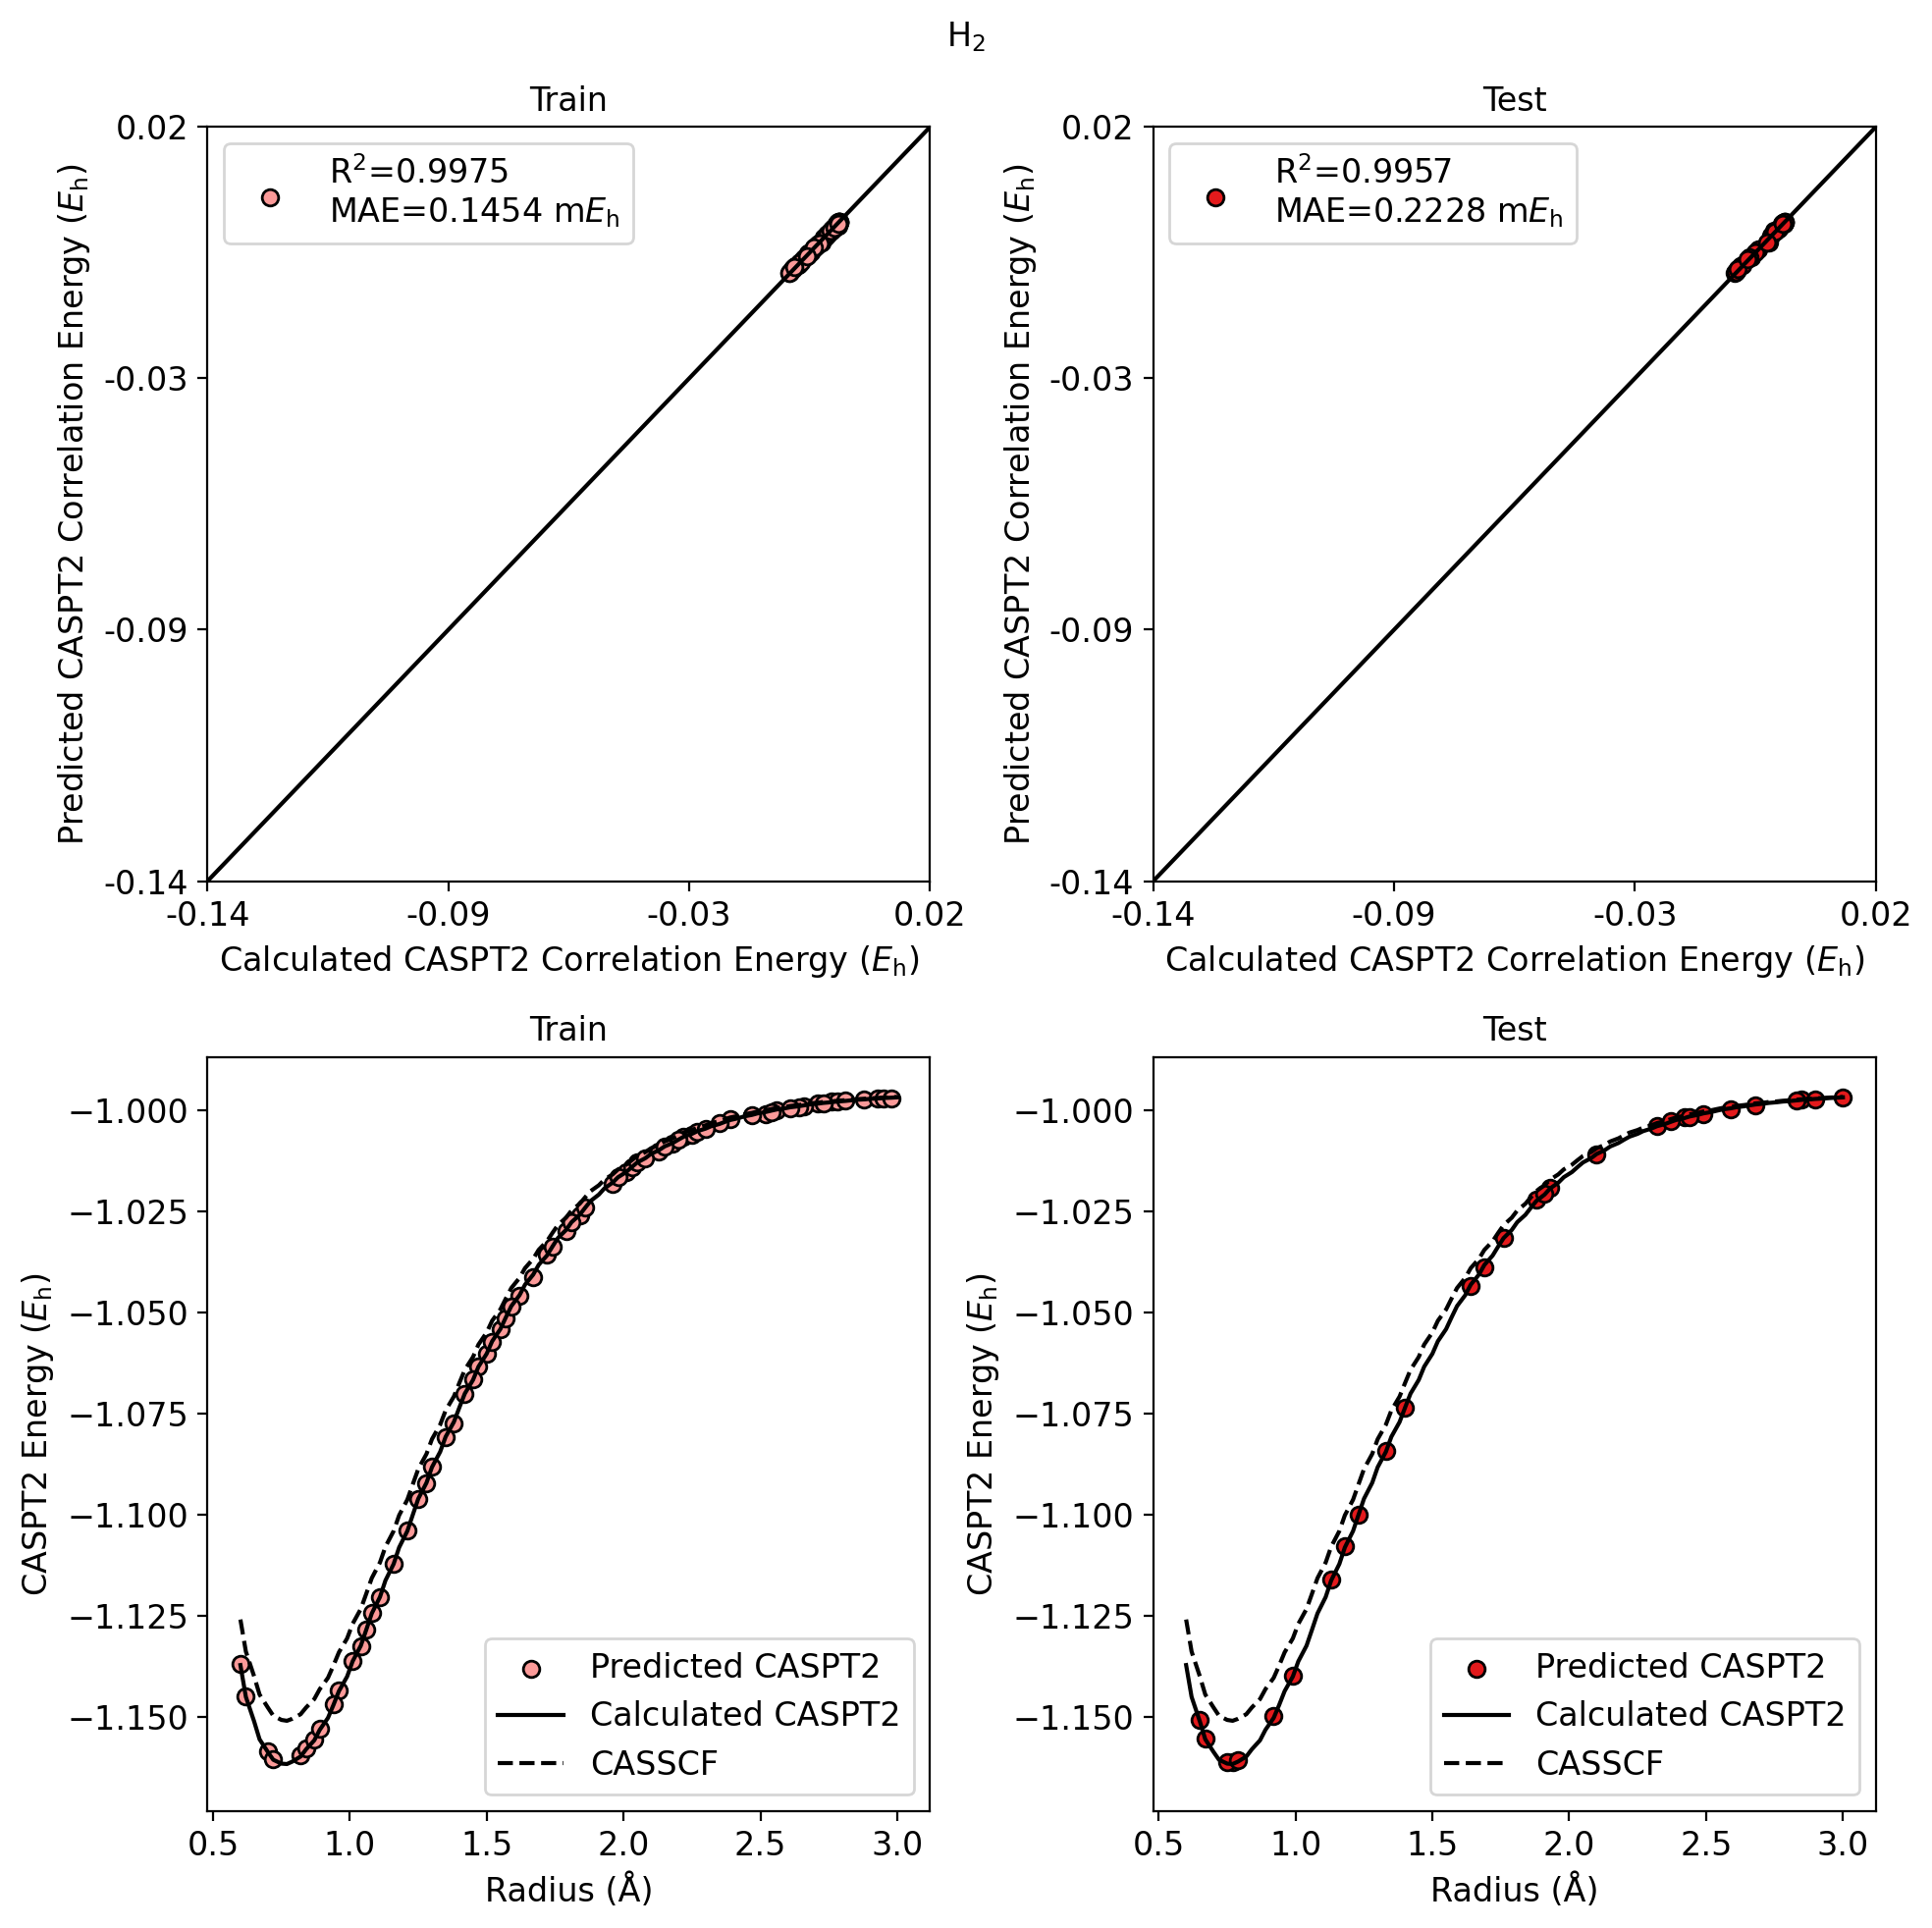

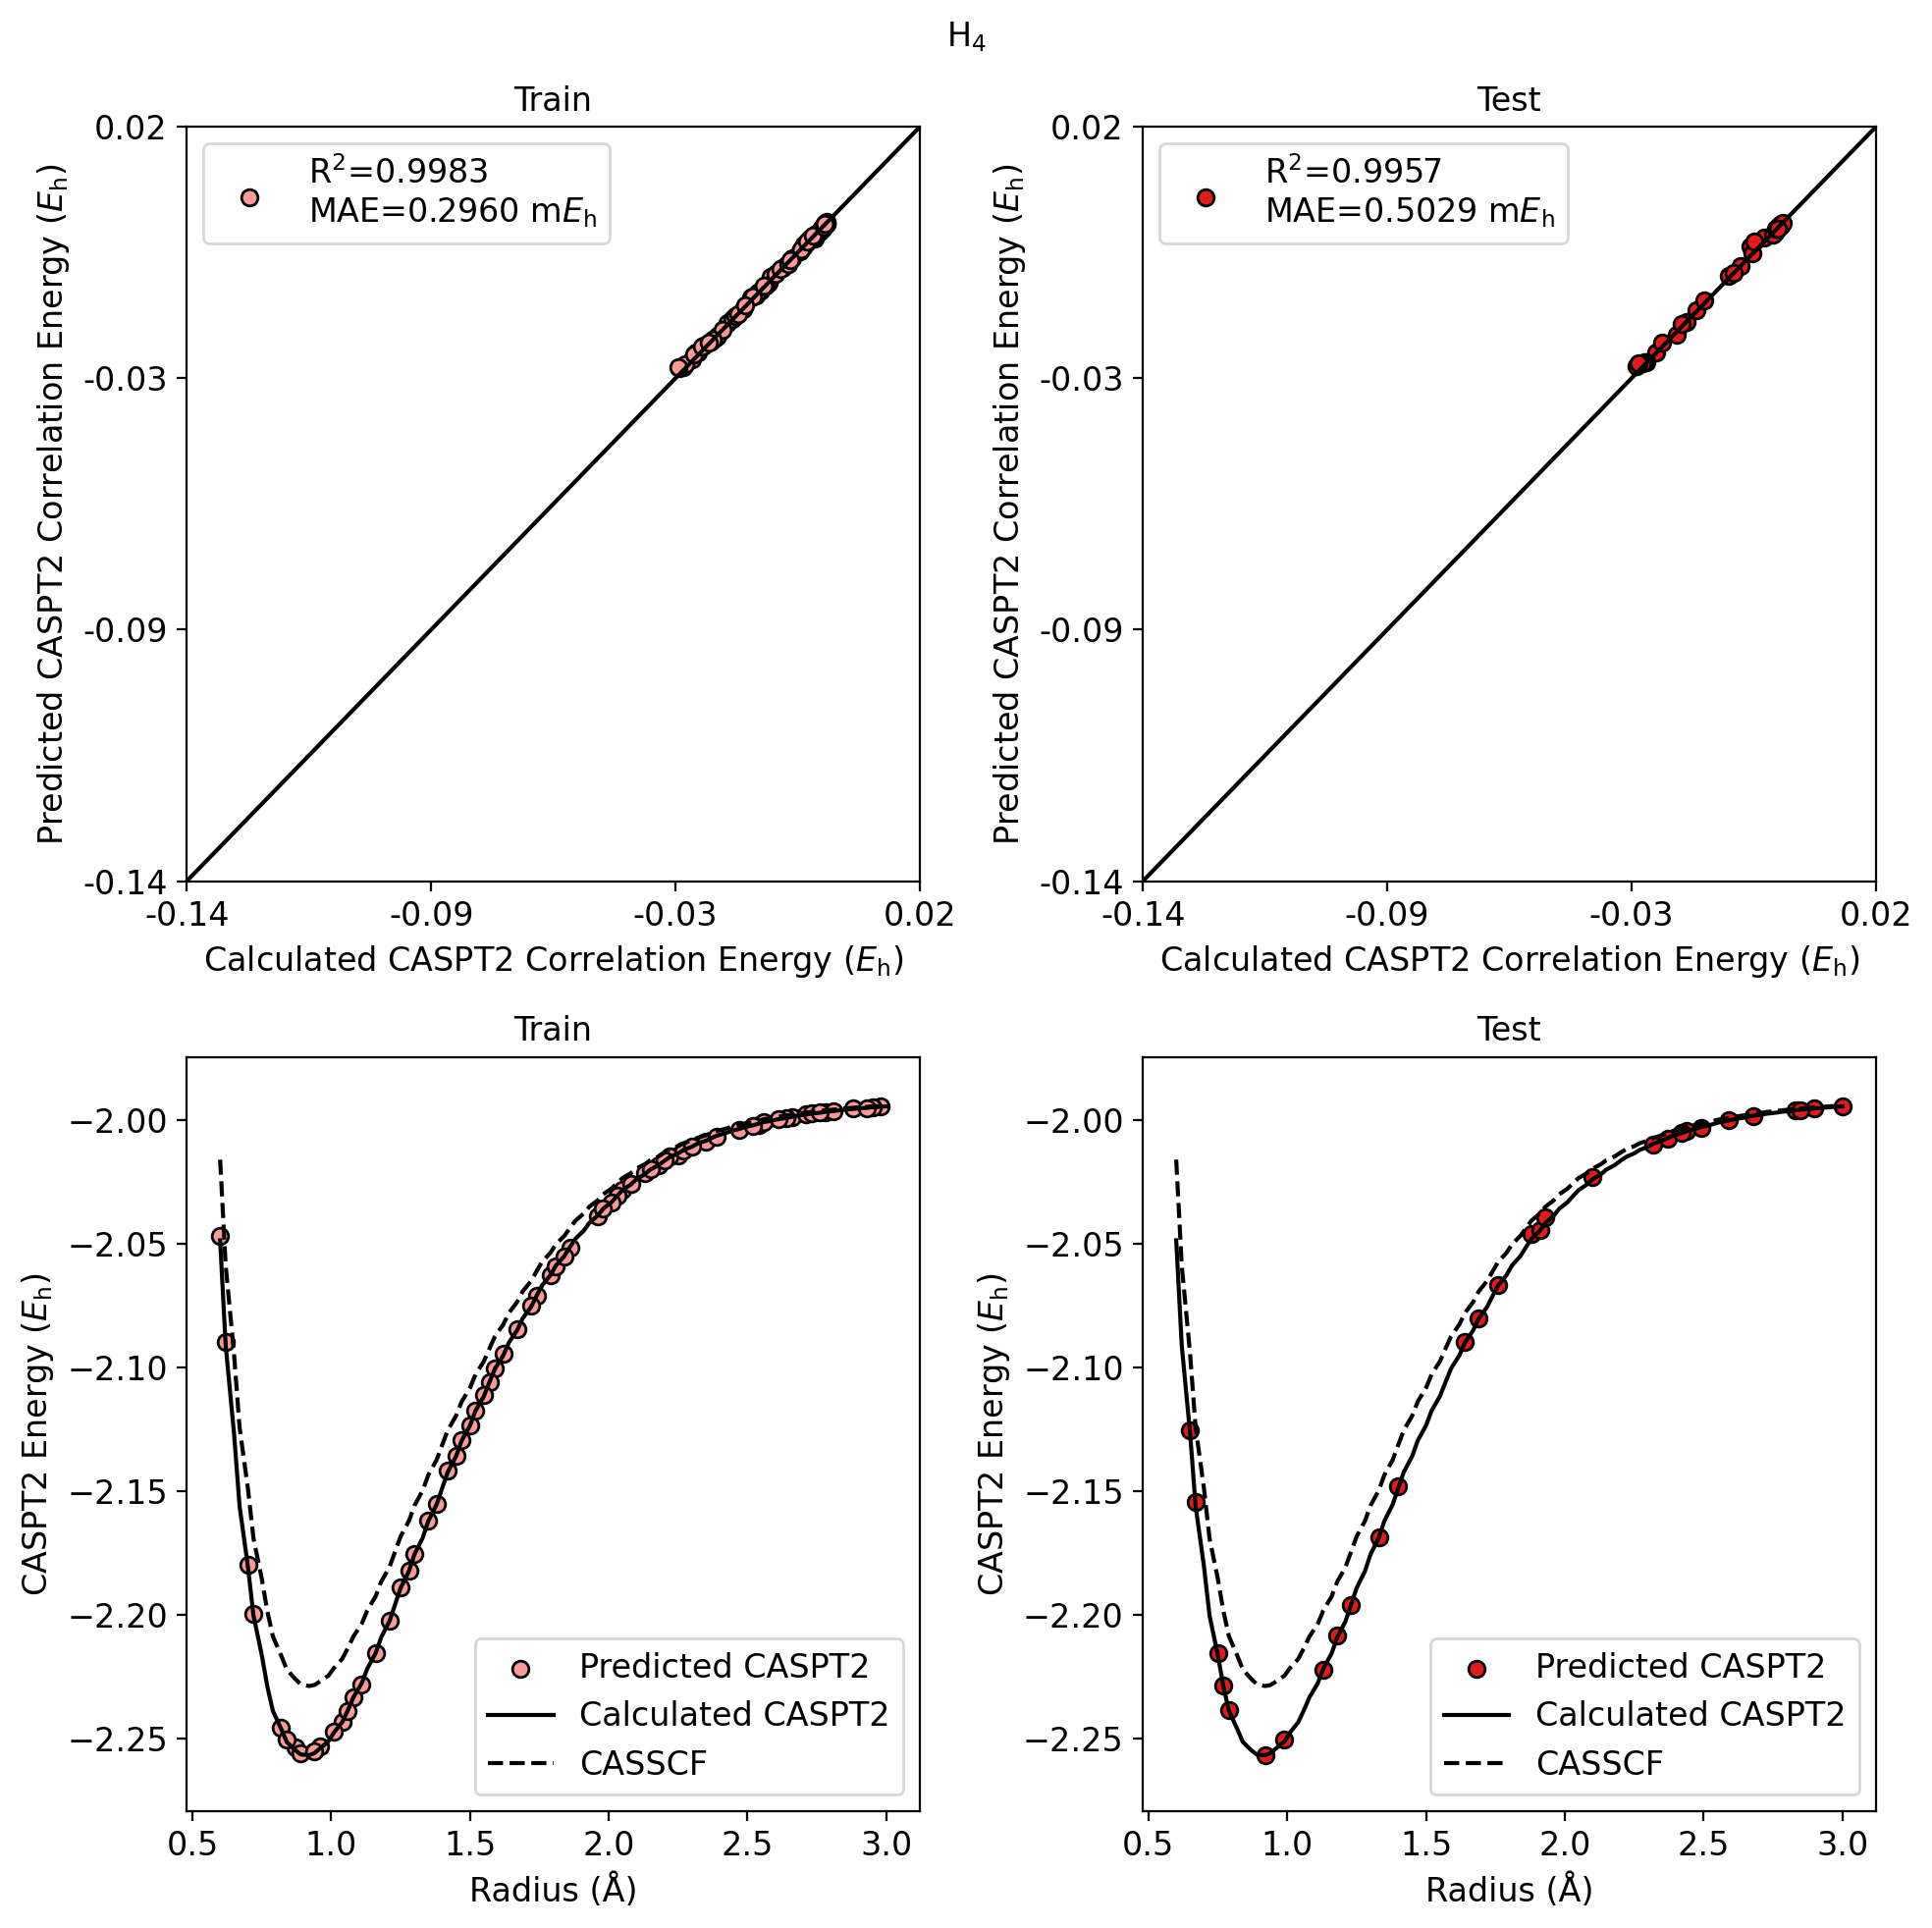

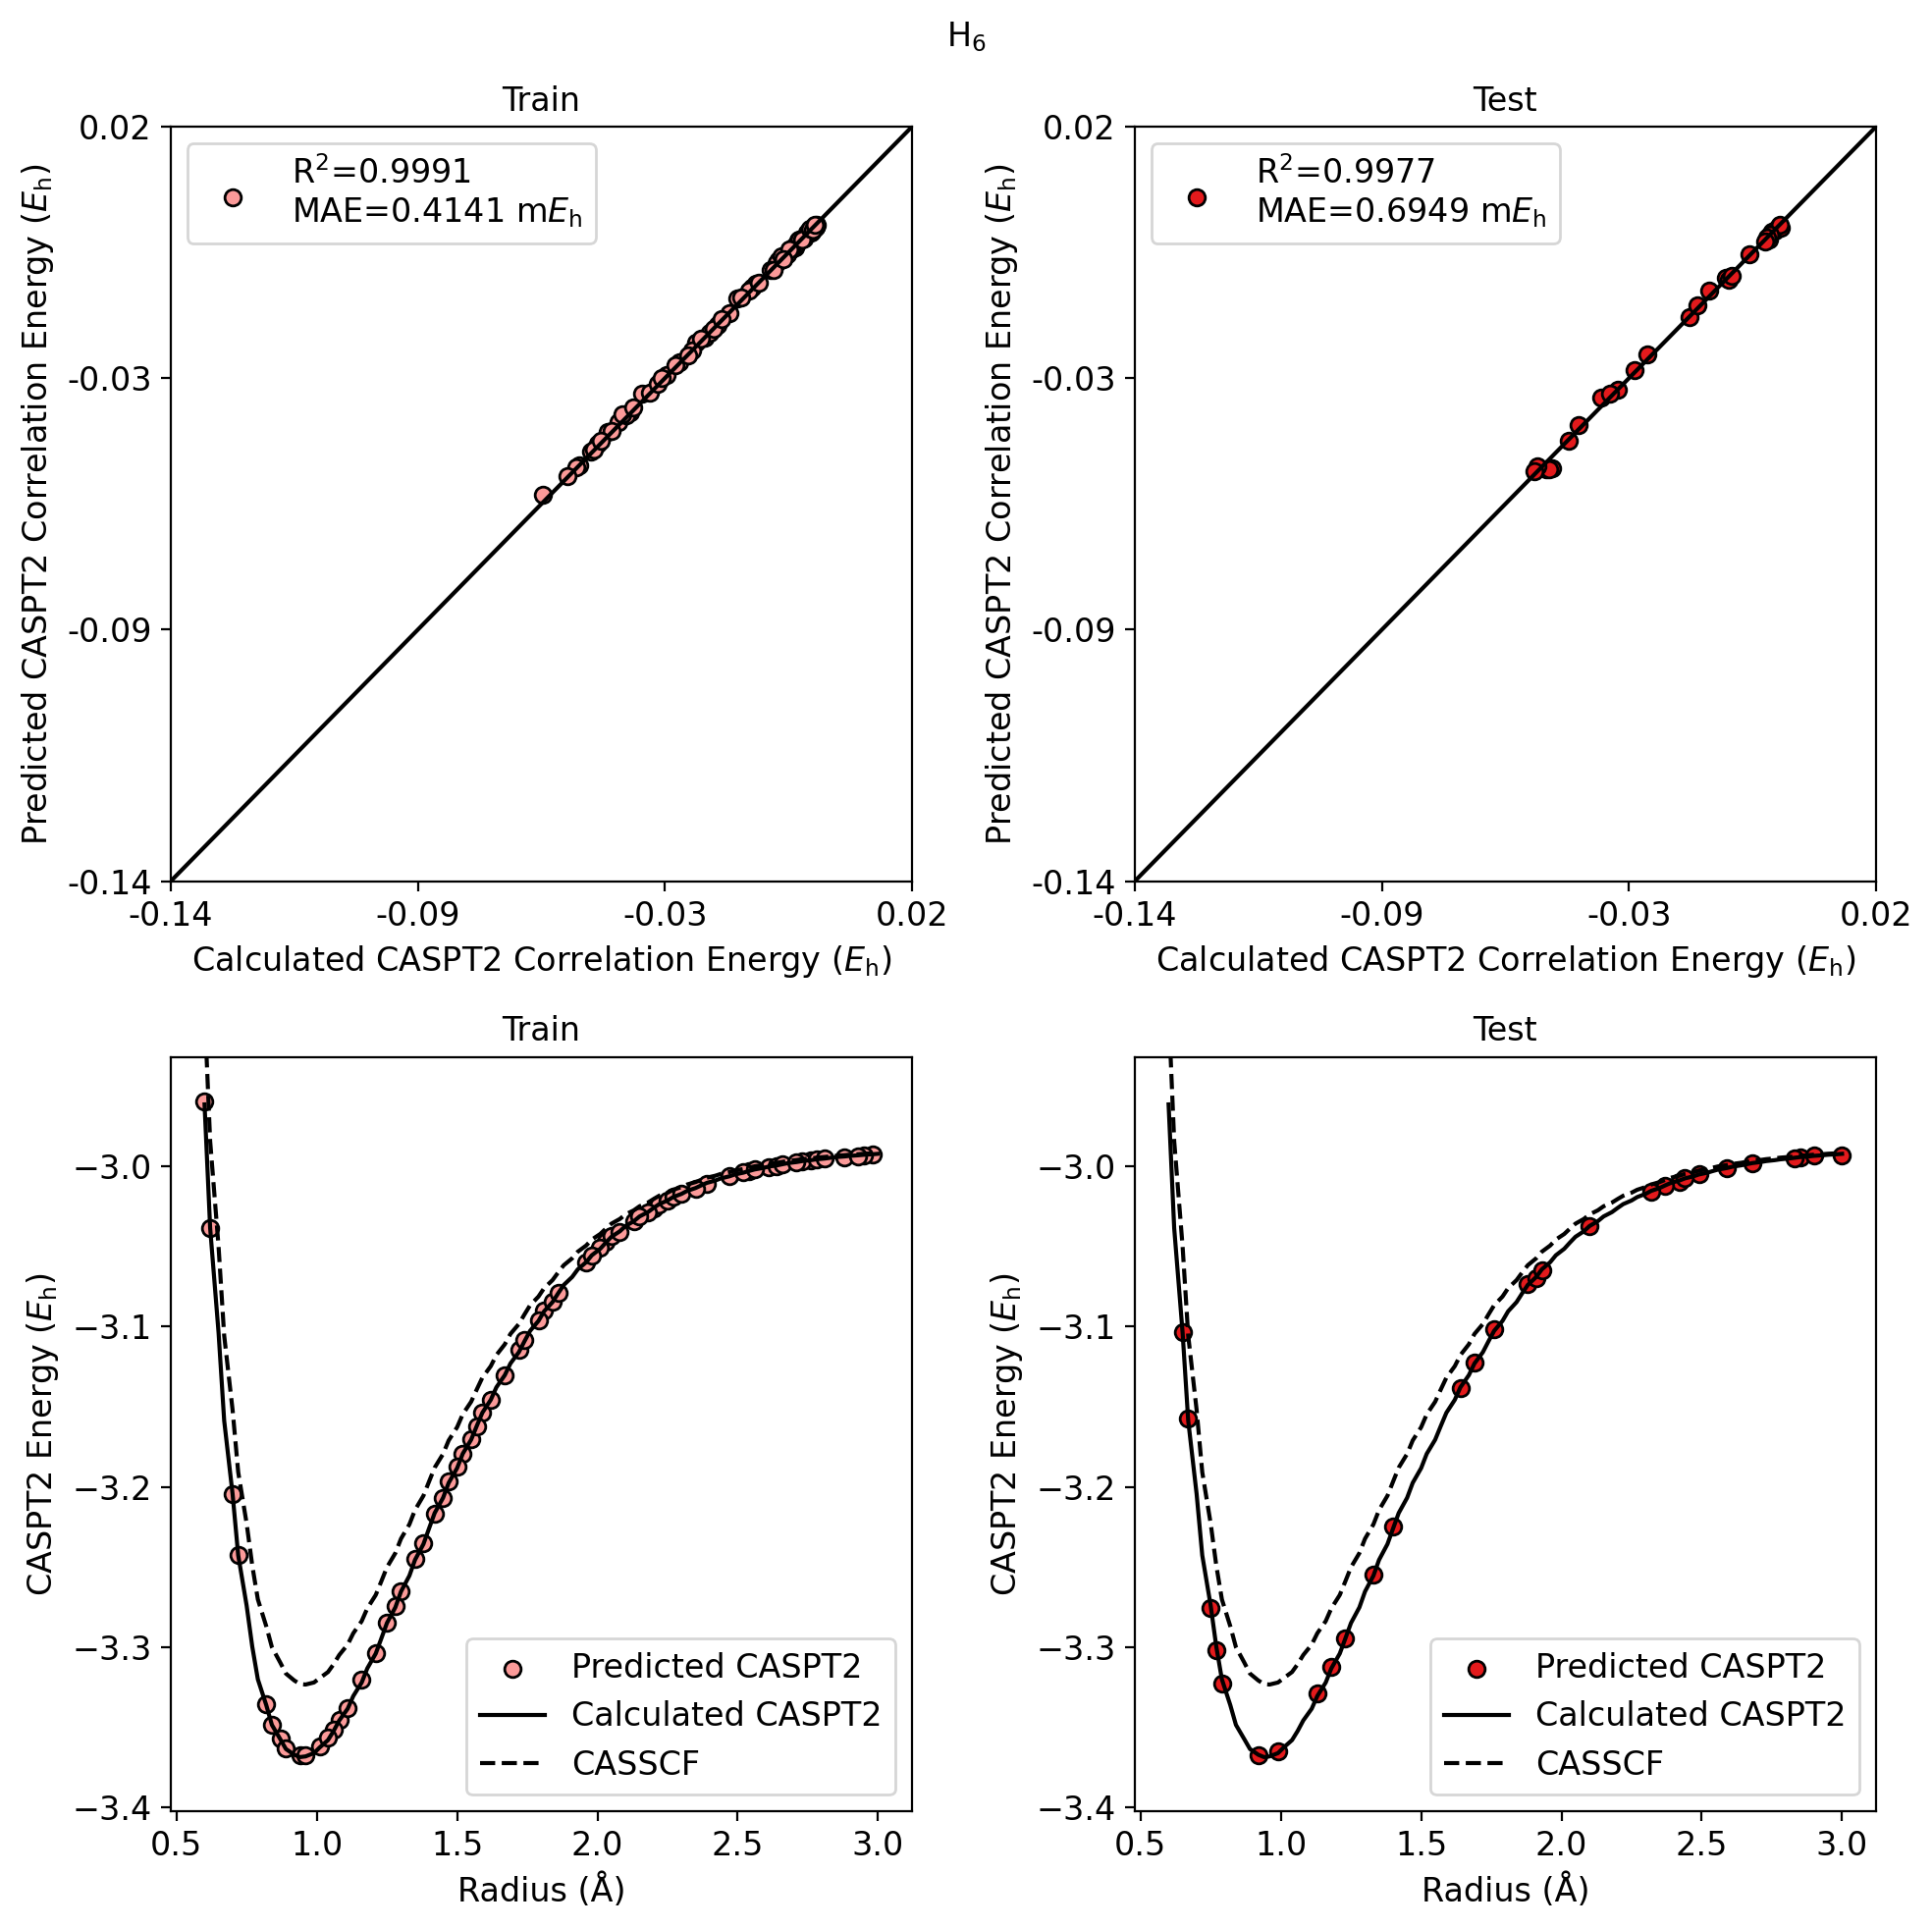

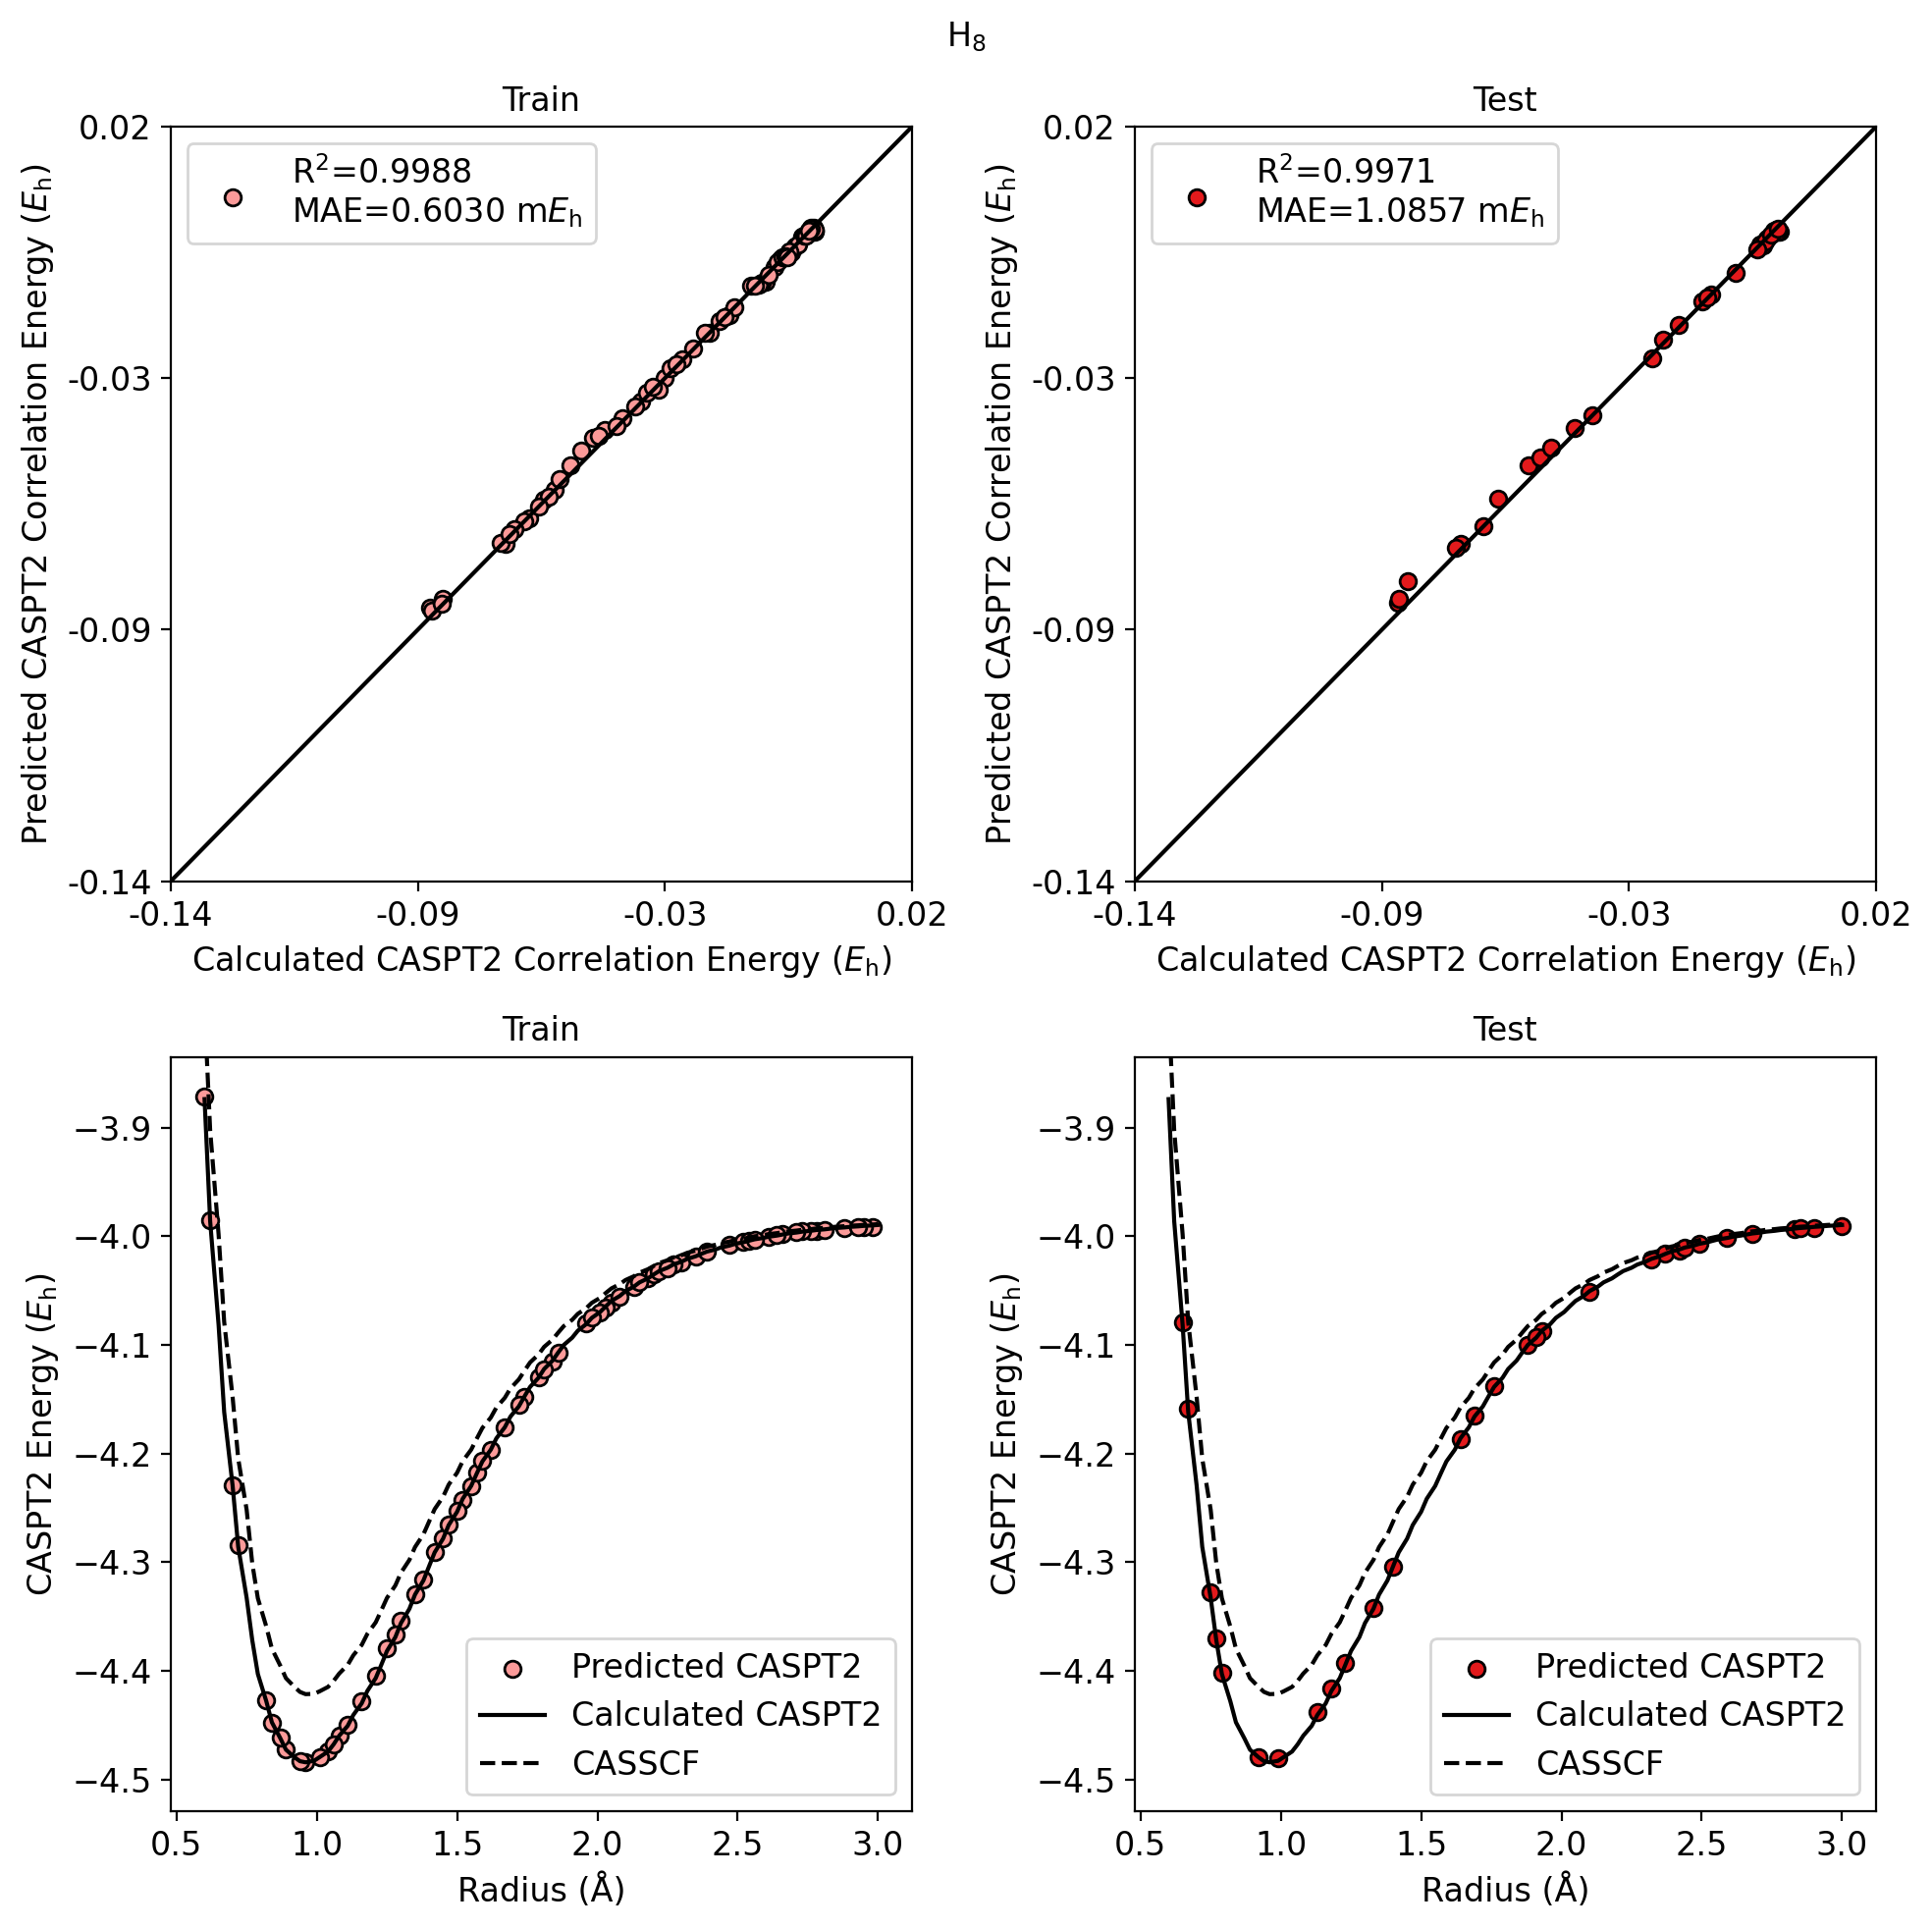

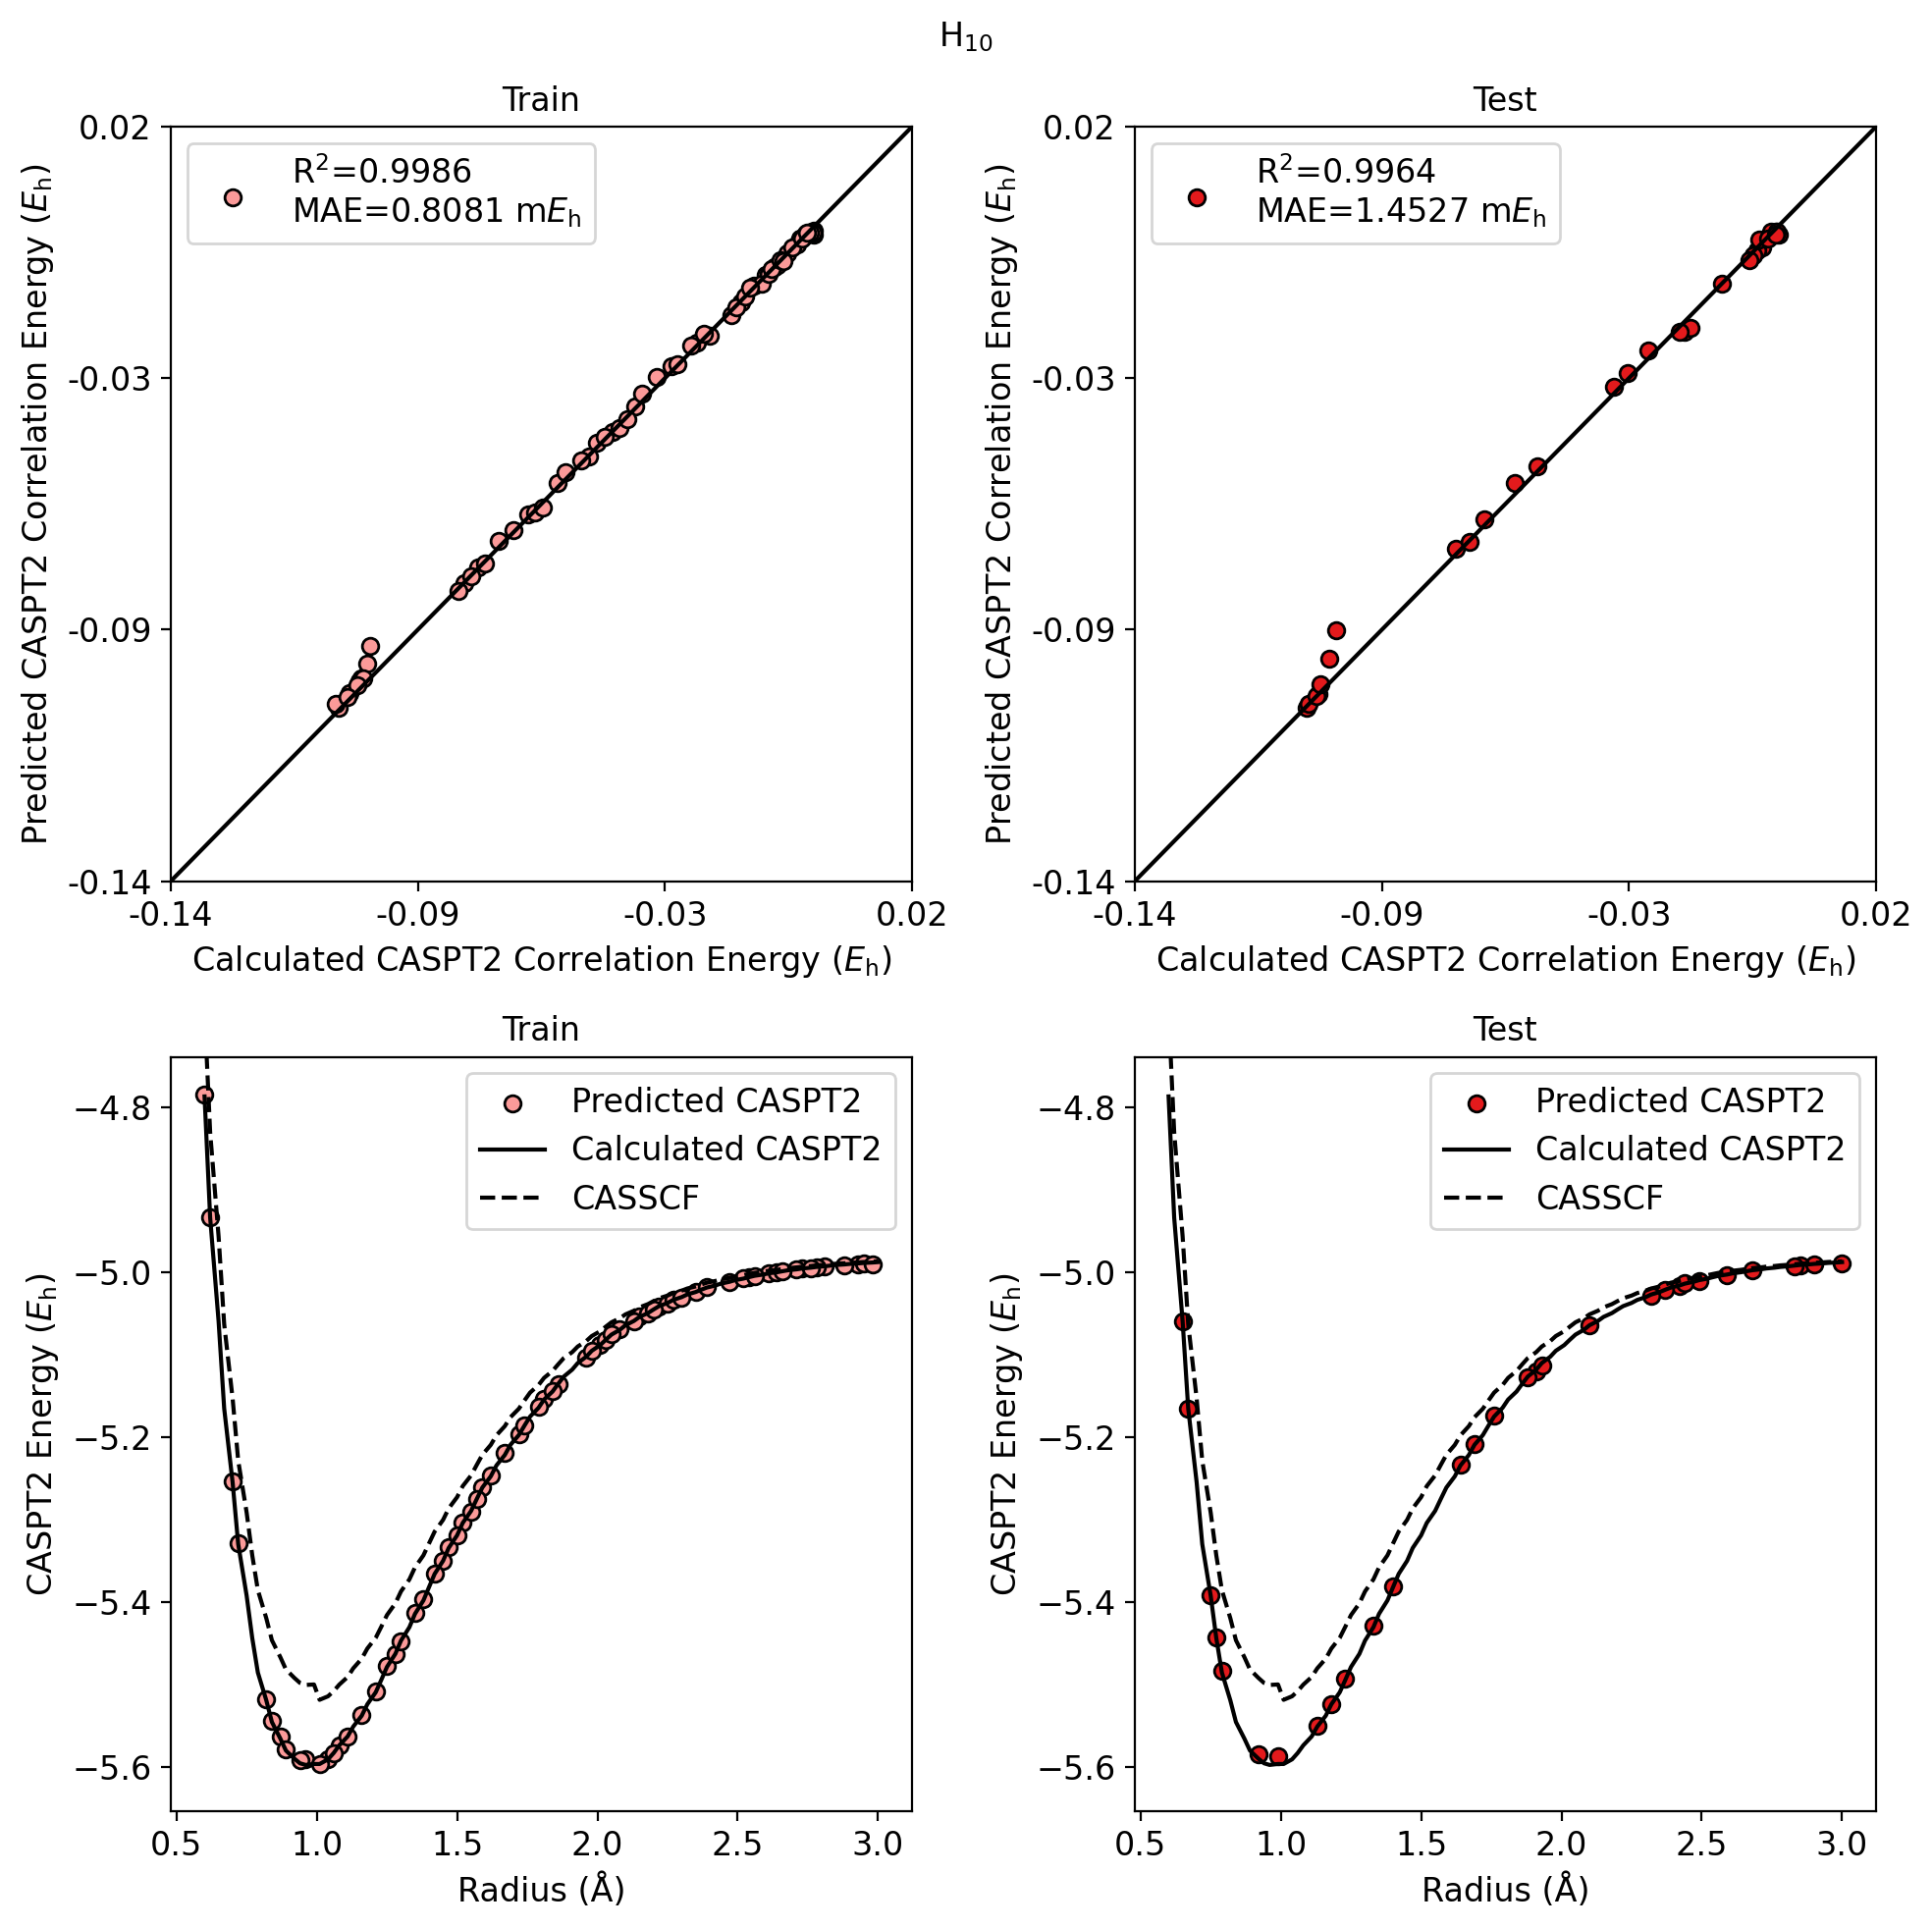

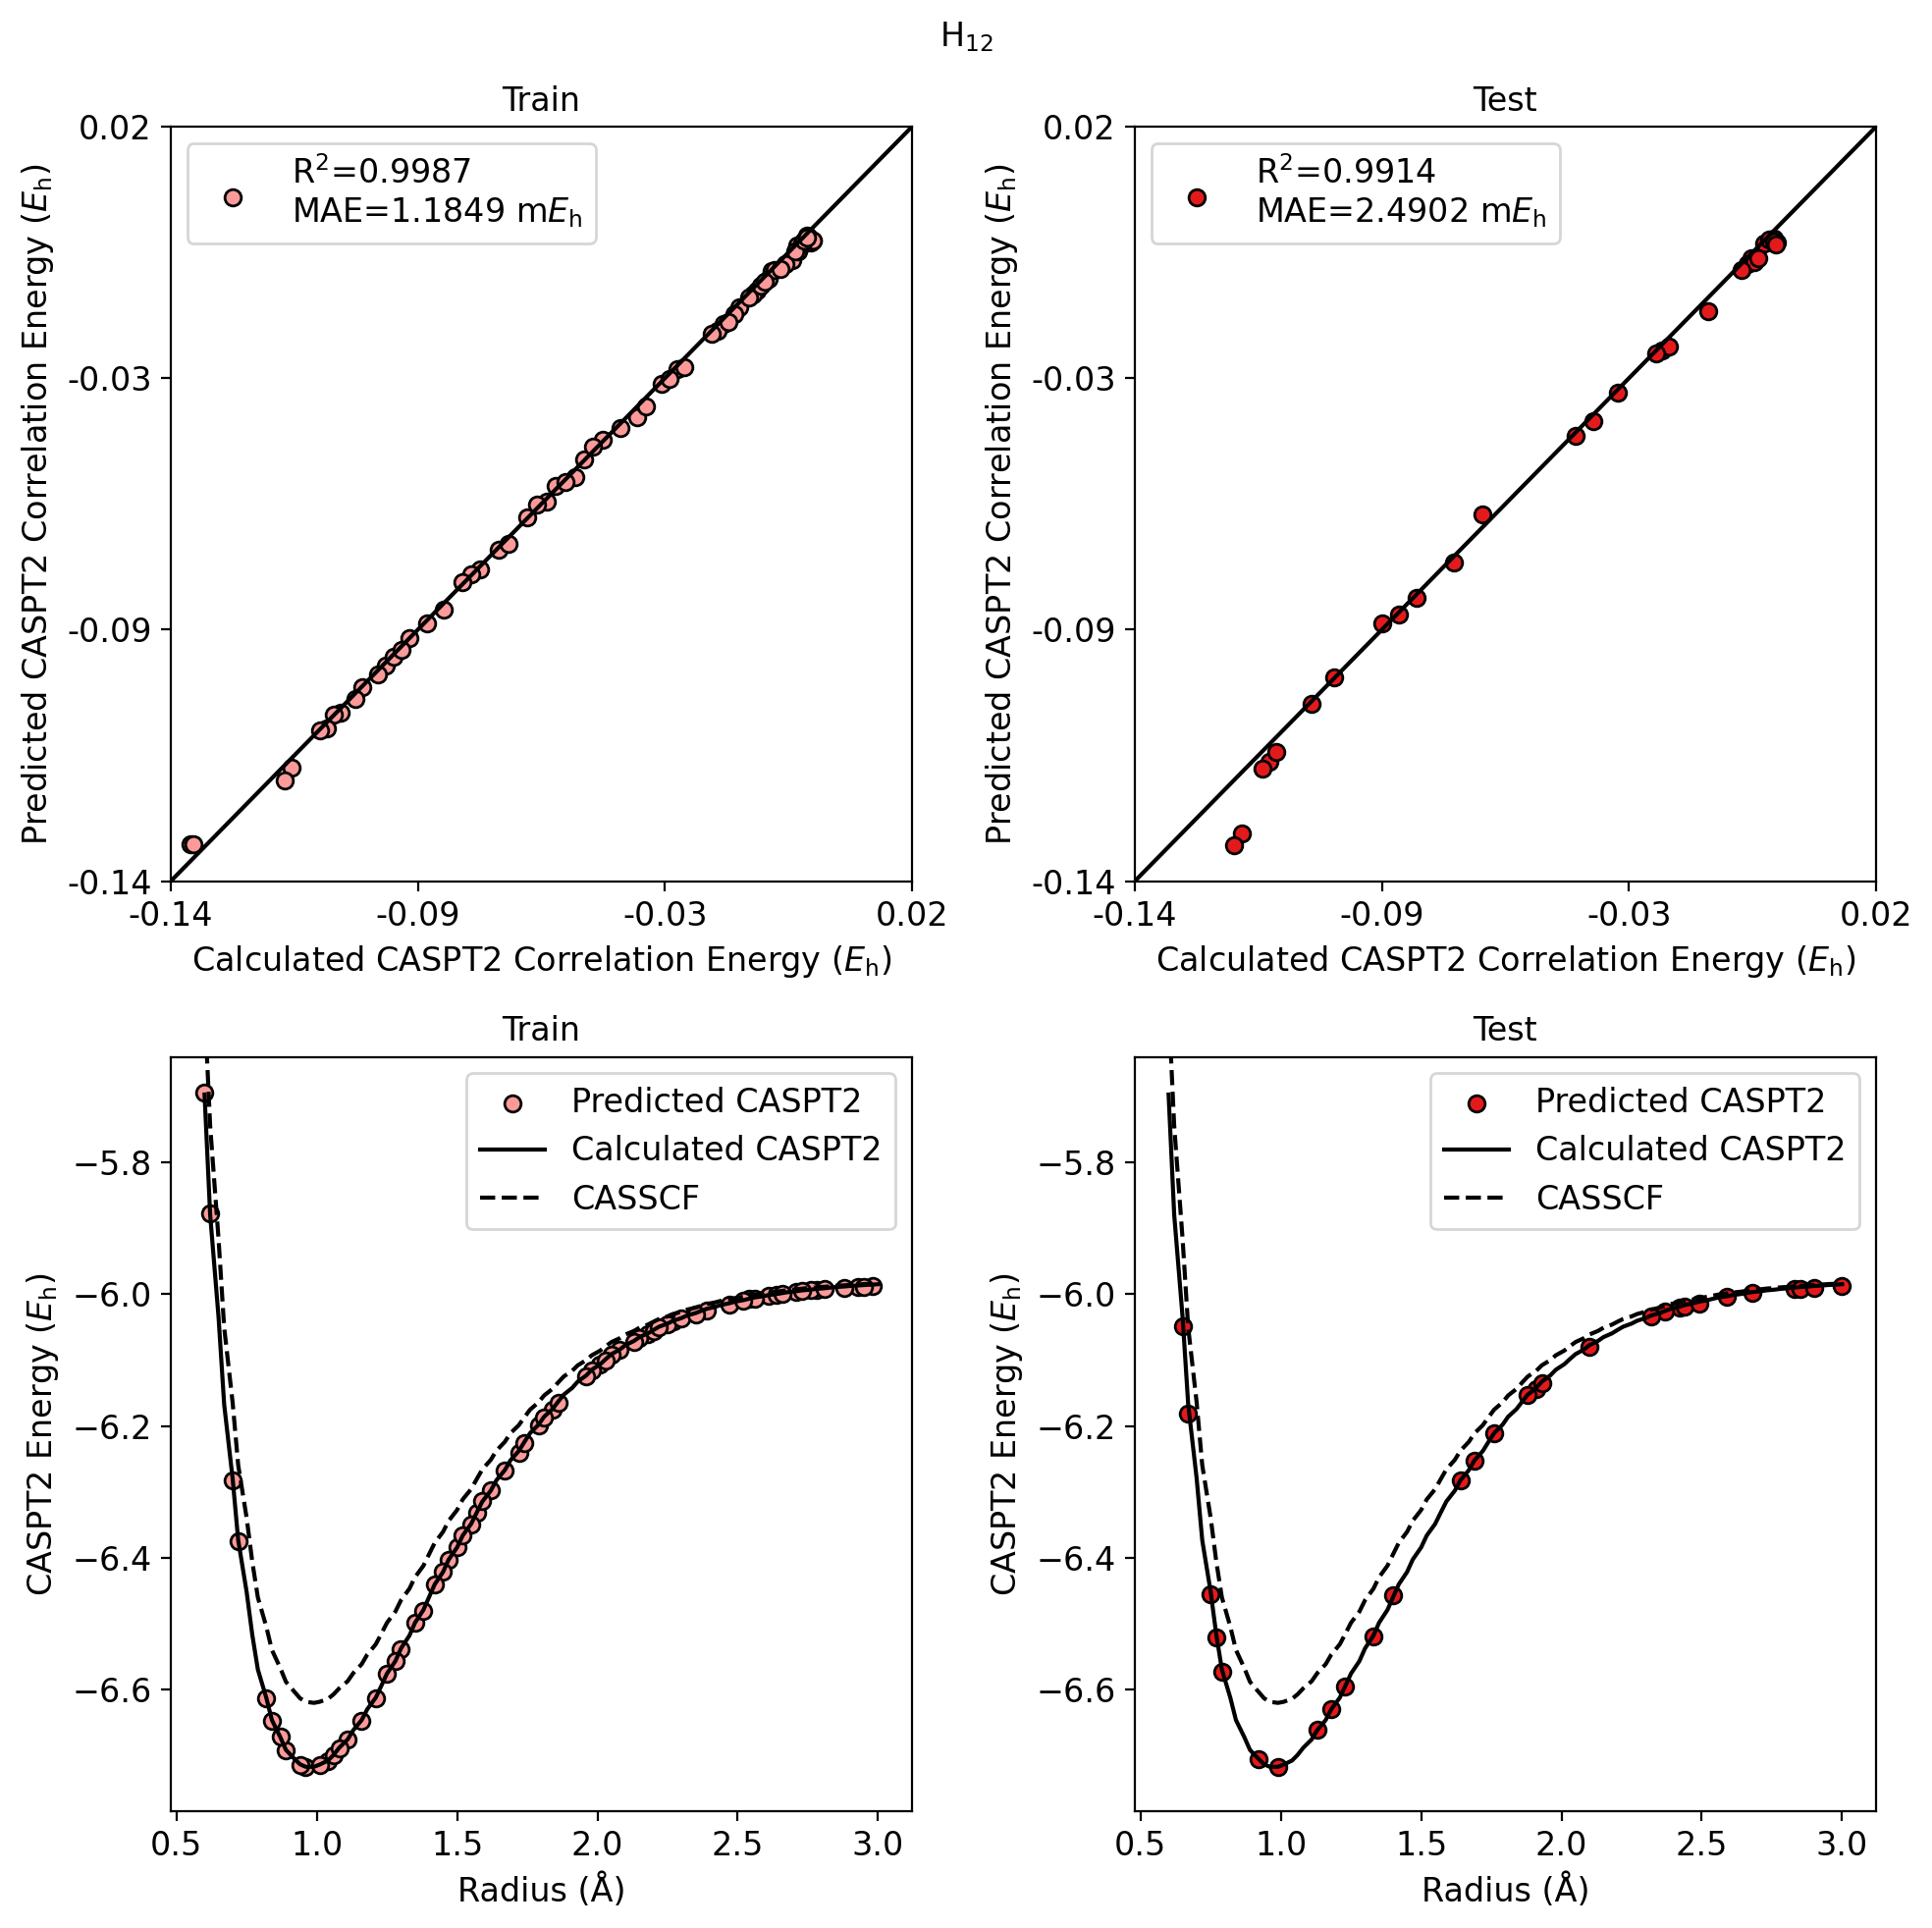

In [31]:
traincorrerr = {}
for n in sorted(set(traincaspt2melt['H$_{2n}$']),key=lambda x: int(x.replace("H",''))):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10),sharey=False)
    
    pred_train,true_train = traincorrE2[traincorrE2['H$_{2n}$']==n]['E$_{2}^{\text{Predicted}}$'],traincorrE2[traincorrE2['H$_{2n}$']==n]['E$_{2}^{\text{Calculated}}$']
    pred_test,true_test = testcorrE2[testcorrE2['H$_{2n}$']==n]['E$_{2}^{\text{Predicted}}$'],testcorrE2[testcorrE2['H$_{2n}$']==n]['E$_{2}^{\text{Calculated}}$']
    testrad = testcorrE2[testcorrE2['H$_{2n}$']==n]['Radius ($\AA$)']    
    train_r2_corr = r2_score(true_train,pred_train)
    test_r2_corr = r2_score(true_test,pred_test)
    test_mae_corr = 1e3*mean_absolute_error(true_test,pred_test)
    train_mae_corr = 1e3*mean_absolute_error(true_train,pred_train)
    
    traincorrerr[n] = {"r2_train":train_r2_corr,"r2_test":test_r2_corr,"mae_train":train_mae_corr,"mae_test":test_mae_corr}
    trainrad = traincorrE2[traincorrE2['H$_{2n}$']==n]['Radius ($\AA$)']

    
    ax1.scatter(true_train,pred_train,label='R$^{2}$='+f'{train_r2_corr:.4f}\nMAE={train_mae_corr:.4f}'+" m$E_{\mathrm{h}}$",color=pairedcp[4],edgecolors='k')
    ax1.plot(np.arange(-1000,1000),np.arange(-1000,1000),'k')
    ax1.set_xlabel('Calculated CASPT2 Correlation Energy ($E_{\mathrm{h}}$)')
    ax1.set_ylabel('Predicted CASPT2 Correlation Energy ($E_{\mathrm{h}}$)')
    ax1.set_title('Train')
    ax1.legend()


    ax2.scatter(true_test,pred_test,label='R$^{2}$='+f'{test_r2_corr:.4f}\nMAE={test_mae_corr:.4f}'+" m$E_{\mathrm{h}}$",color=pairedcp[5],edgecolors='k')
    ax2.plot(np.arange(-1000,1000),np.arange(-1000,1000),'k')
    ax2.set_xlabel('Calculated CASPT2 Correlation Energy ($E_{\mathrm{h}}$)')
    ax2.set_ylabel('Predicted CASPT2 Correlation Energy ($E_{\mathrm{h}}$)')
    ax2.set_title('Test')    
    ax2.legend()

    pred_train,true_train = traincorrE2[traincorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Predicted}}$'],traincorrE2[traincorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Calculated}}$']
    pred_test,true_test = testcorrE2[testcorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Predicted}}$'],testcorrE2[testcorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Calculated}}$']
    testrad = testcorrE2[testcorrE2['H$_{2n}$']==n]['Radius ($\AA$)']    
    train_r2_corr = r2_score(true_train,pred_train)
    test_r2_corr = r2_score(true_test,pred_test)
    test_mae_corr = 1e3*mean_absolute_error(true_test,pred_test)
    train_mae_corr = 1e3*mean_absolute_error(true_train,pred_train)

    
    
    traincorrerr[n] = {"r2_train":train_r2_corr,"r2_test":test_r2_corr,"mae_train":train_mae_corr,"mae_test":test_mae_corr}
    trainrad = traincorrE2[traincorrE2['H$_{2n}$']==n]['Radius ($\AA$)']
    
    ax3.scatter(np.array(trainrad,dtype=float),pred_train,color=pairedcp[4],edgecolors='k',label='Predicted CASPT2')
    ax3.plot(allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'].astype(float),allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASPT2}}^{\text{Calculated}}$'].astype(float),'k',label='Calculated CASPT2')
    ax3.plot(allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'].astype(float),allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASSCF}}^{\text{Calculated}}$'].astype(float),'k--',label='CASSCF')
    ax3.set_xlabel('Radius (Å)')
    ax3.set_ylabel('CASPT2 Energy ($E_{\mathrm{h}}$)')
    ax3.set_title('Train')
    ax3.legend()
    
    ax4.scatter(np.array(testrad,dtype=float),pred_test,color=pairedcp[5],edgecolors='k',label='Predicted CASPT2')
    ax4.plot(allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'].astype(float),allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASPT2}}^{\text{Calculated}}$'].astype(float),'k',label='Calculated CASPT2')

    # allcorr[allcorr['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Calculated}}$']
    ax4.plot(allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'].astype(float),allcorr[allcorr['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASSCF}}^{\text{Calculated}}$'].astype(float),'k--',label='CASSCF')    
    ax4.set_xlabel('Radius (Å)')
    ax4.set_ylabel('CASPT2 Energy ($E_{\mathrm{h}}$)')
    ax4.set_title('Test') 
    ax4.legend()
    

    
    bottom, top = -0.14, 0.02
    ax1.set_xlim(bottom, top)
    ax1.set_ylim(bottom, top)
    ax2.set_xlim(bottom, top)
    ax2.set_ylim(bottom, top)
    ax1.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])
    ax1.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])   
    
    minpt2, maxpt2= pd.concat([true_train,true_test]).min(), pd.concat([true_train,true_test]).max()
    pct=0.01
    bufferbot, buffertop = minpt2*pct, maxpt2*pct
    ax3.set_ylim(minpt2+bufferbot, maxpt2-buffertop)
    # ax3.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)]) 
    ax4.set_ylim(minpt2+bufferbot, maxpt2-buffertop)
    # ax4.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)]) 

    fig.suptitle("H$_{"+re.findall(r'\d+',n)[0]+"}$")
    
    plt.subplots_adjust(wspace=0.05)
    plt.tight_layout()
    plt.savefig(f'images/{n}_CASPT2.png',dpi=300,bbox_inches='tight')
    plt.show()    

H2


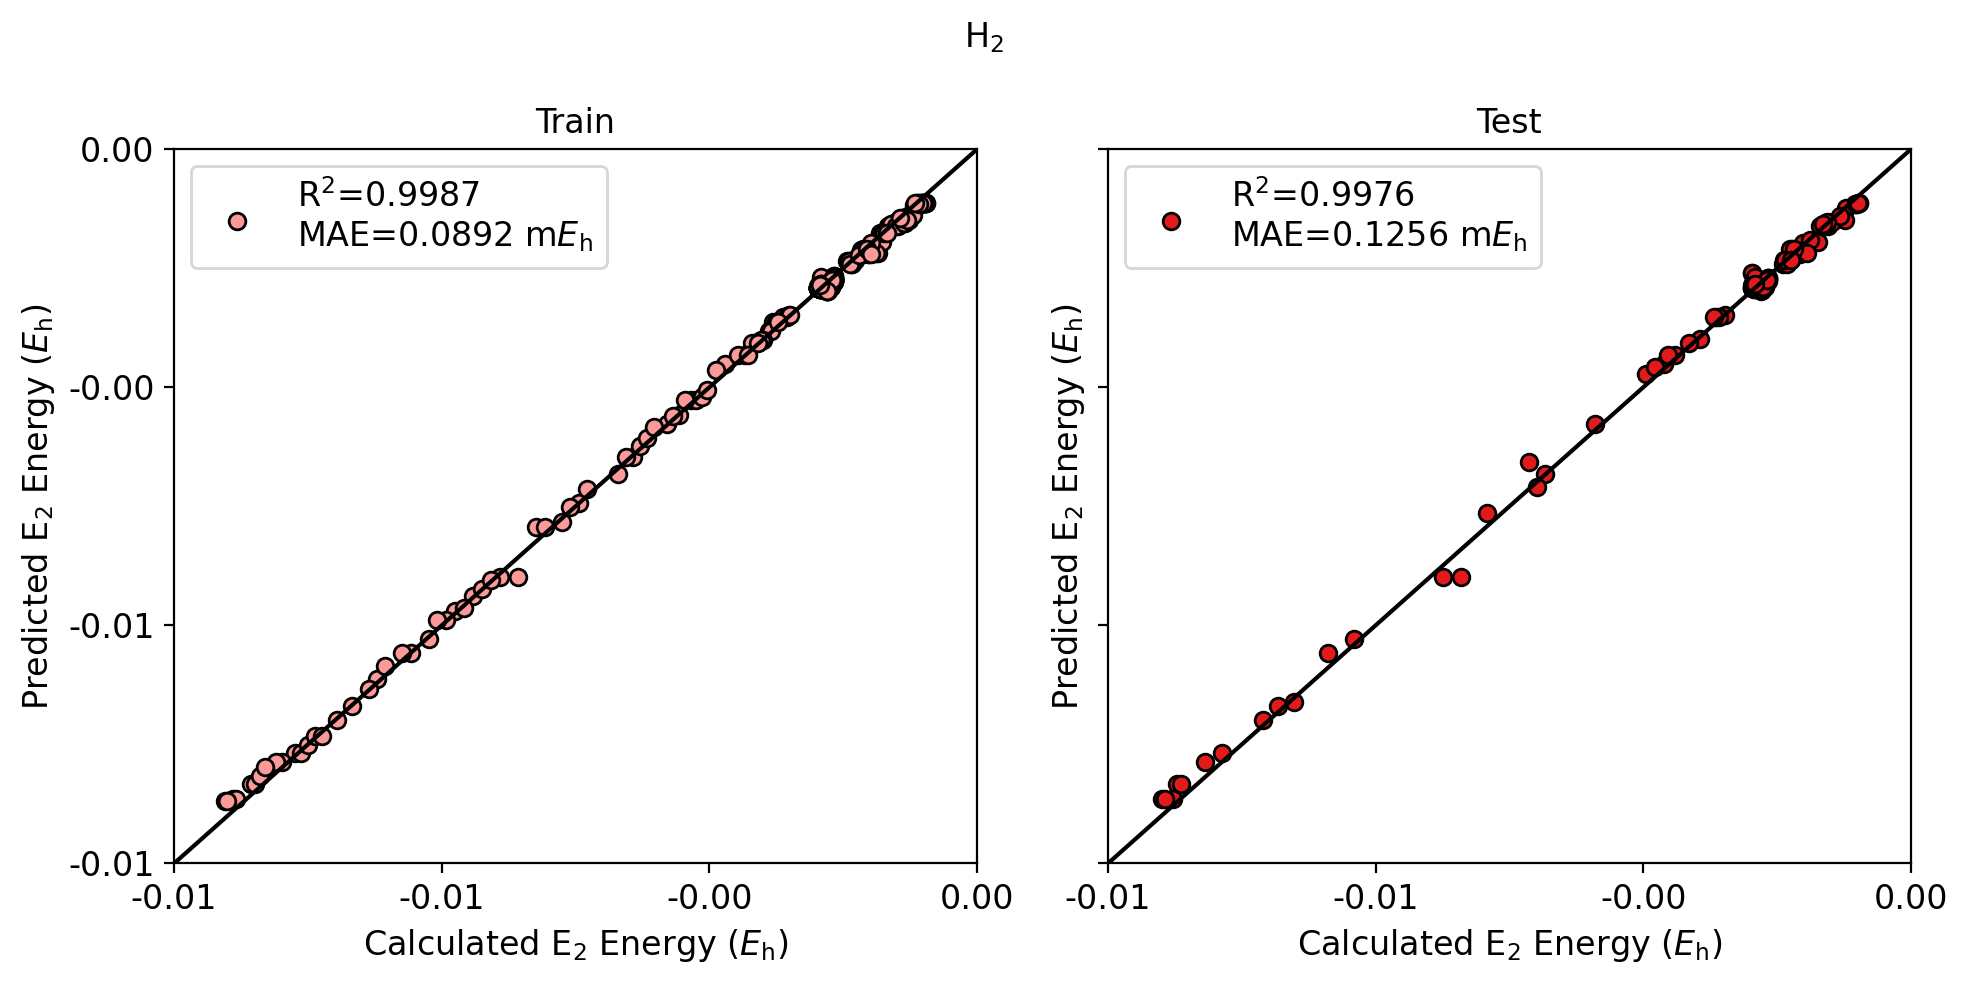

H4


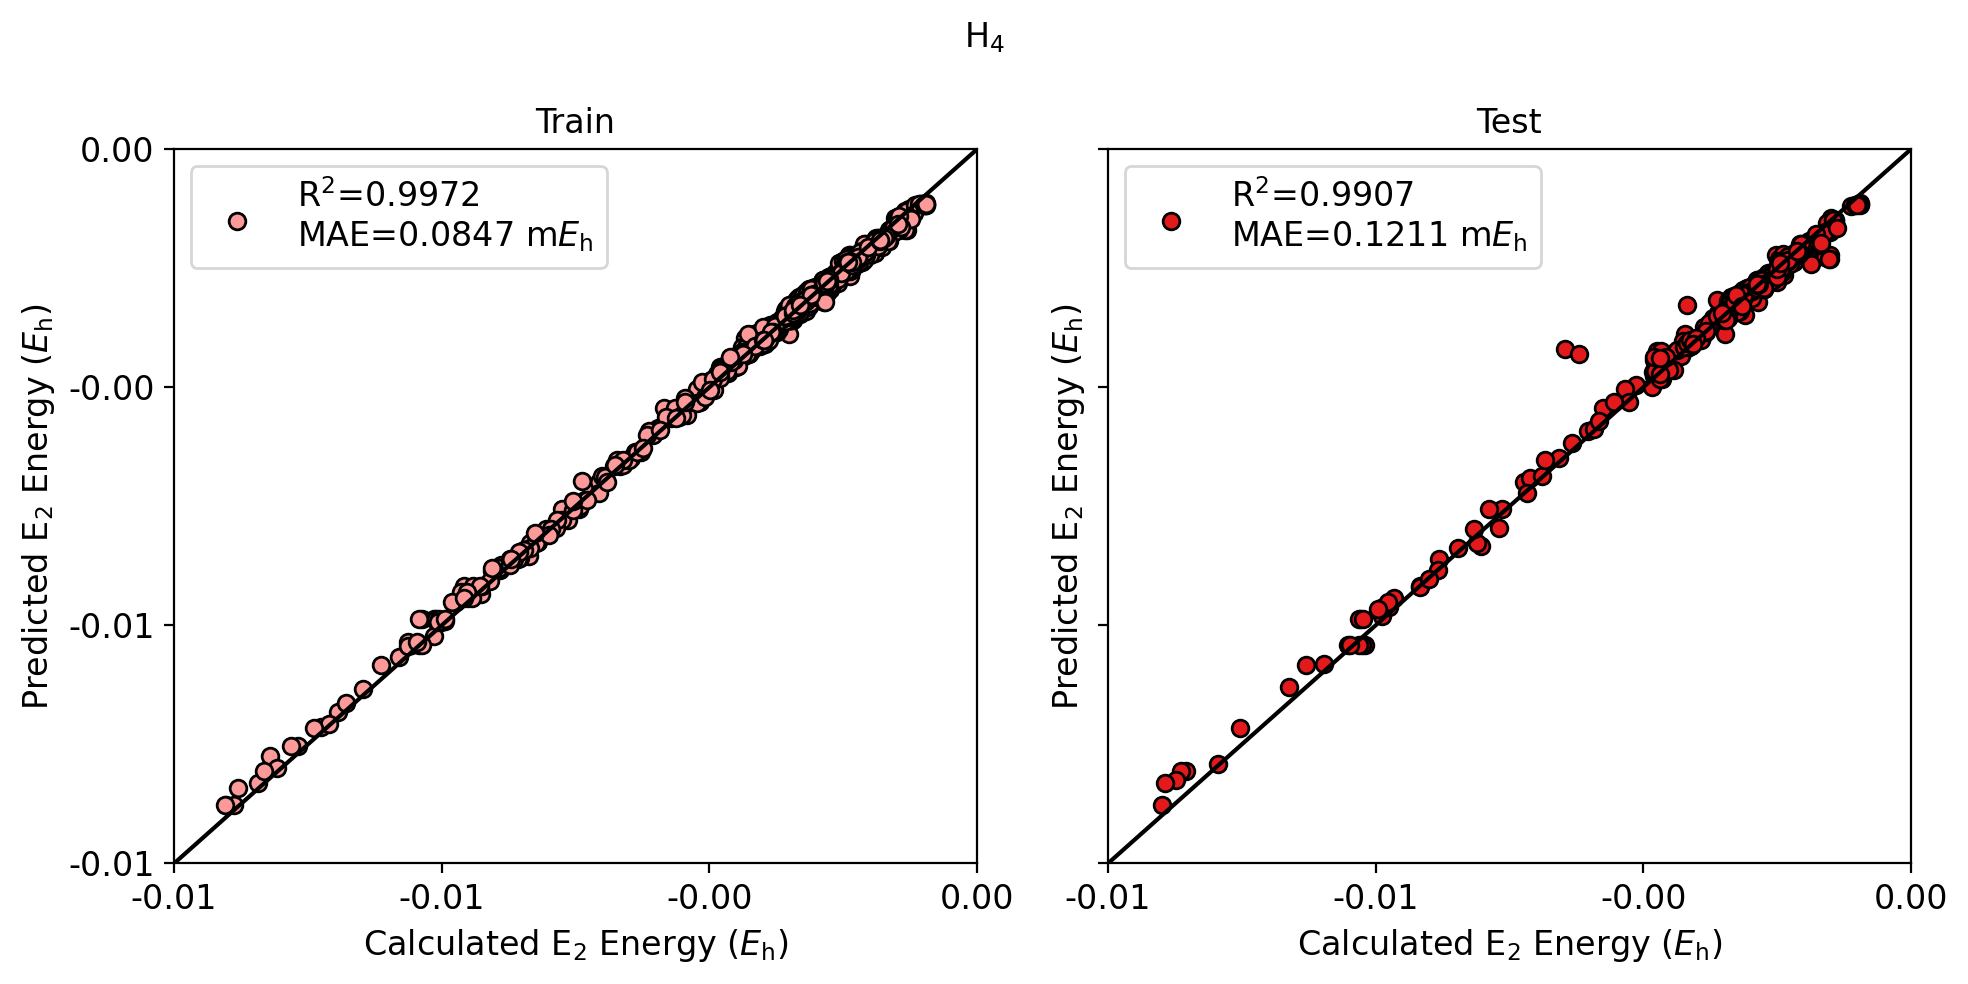

H6


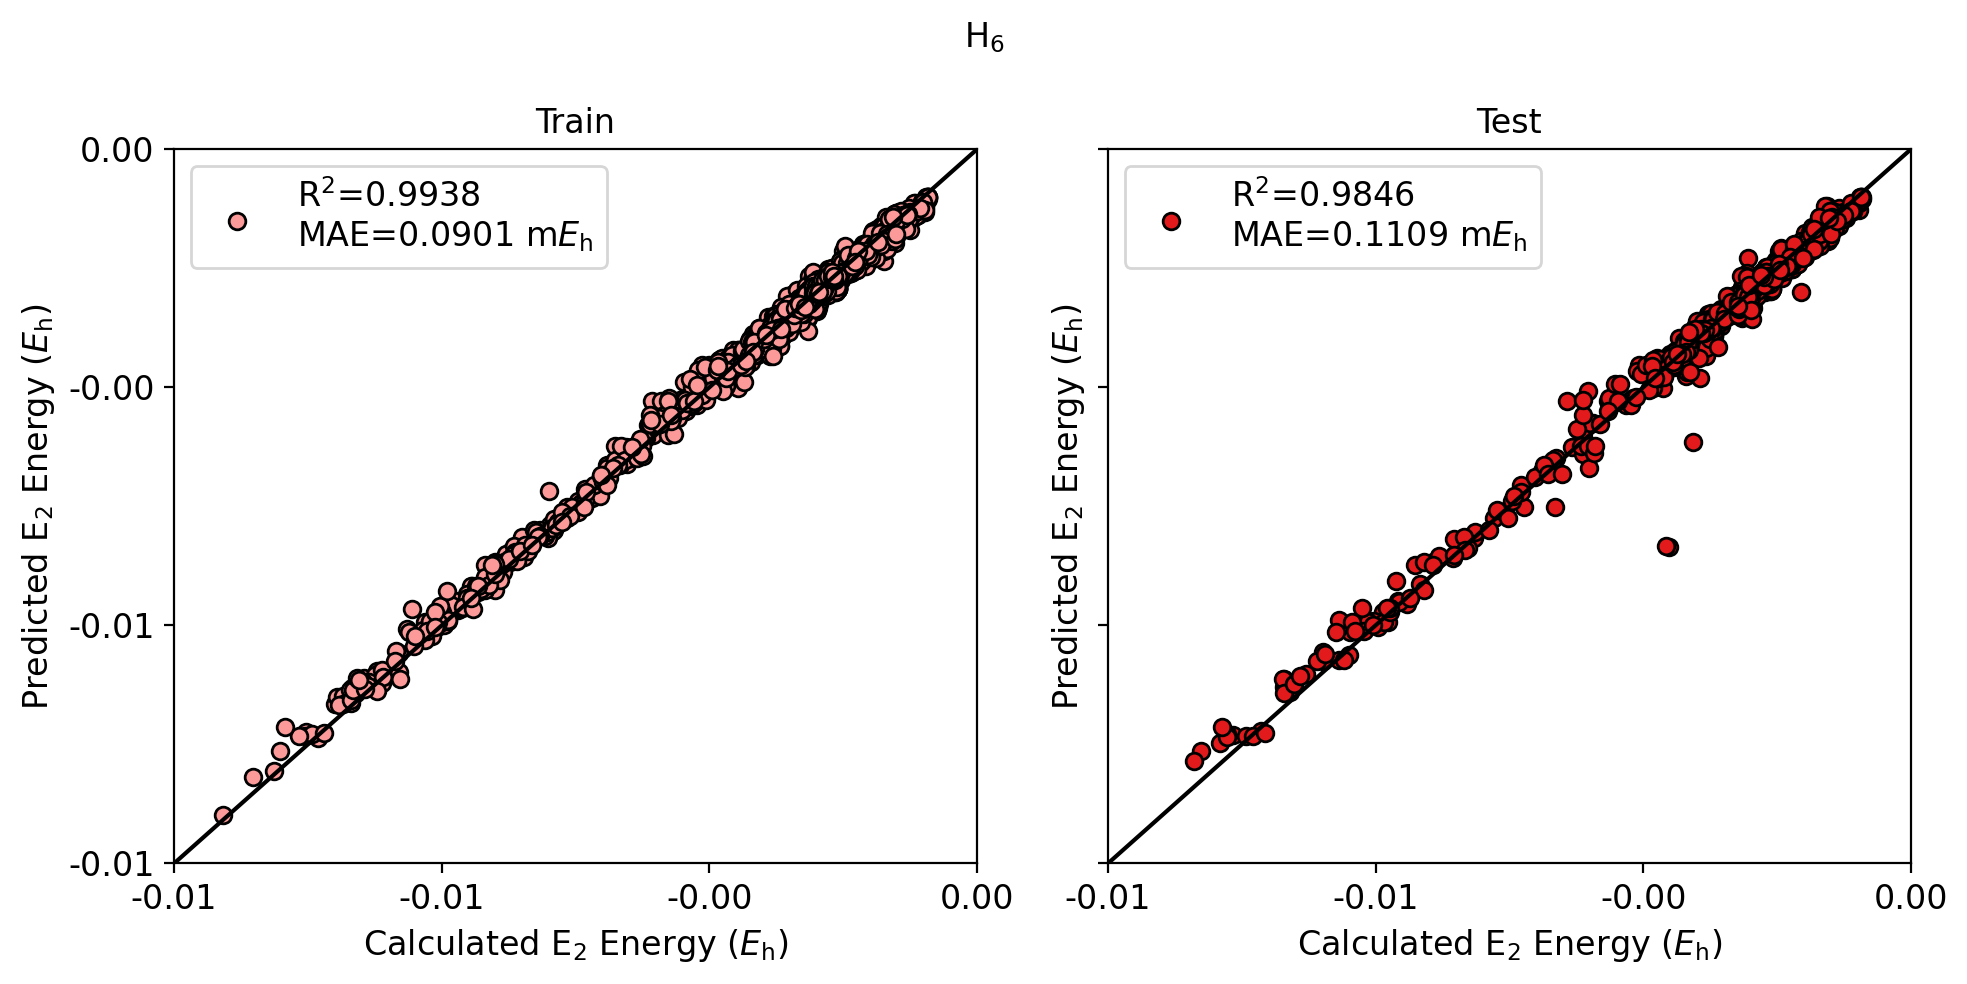

H8


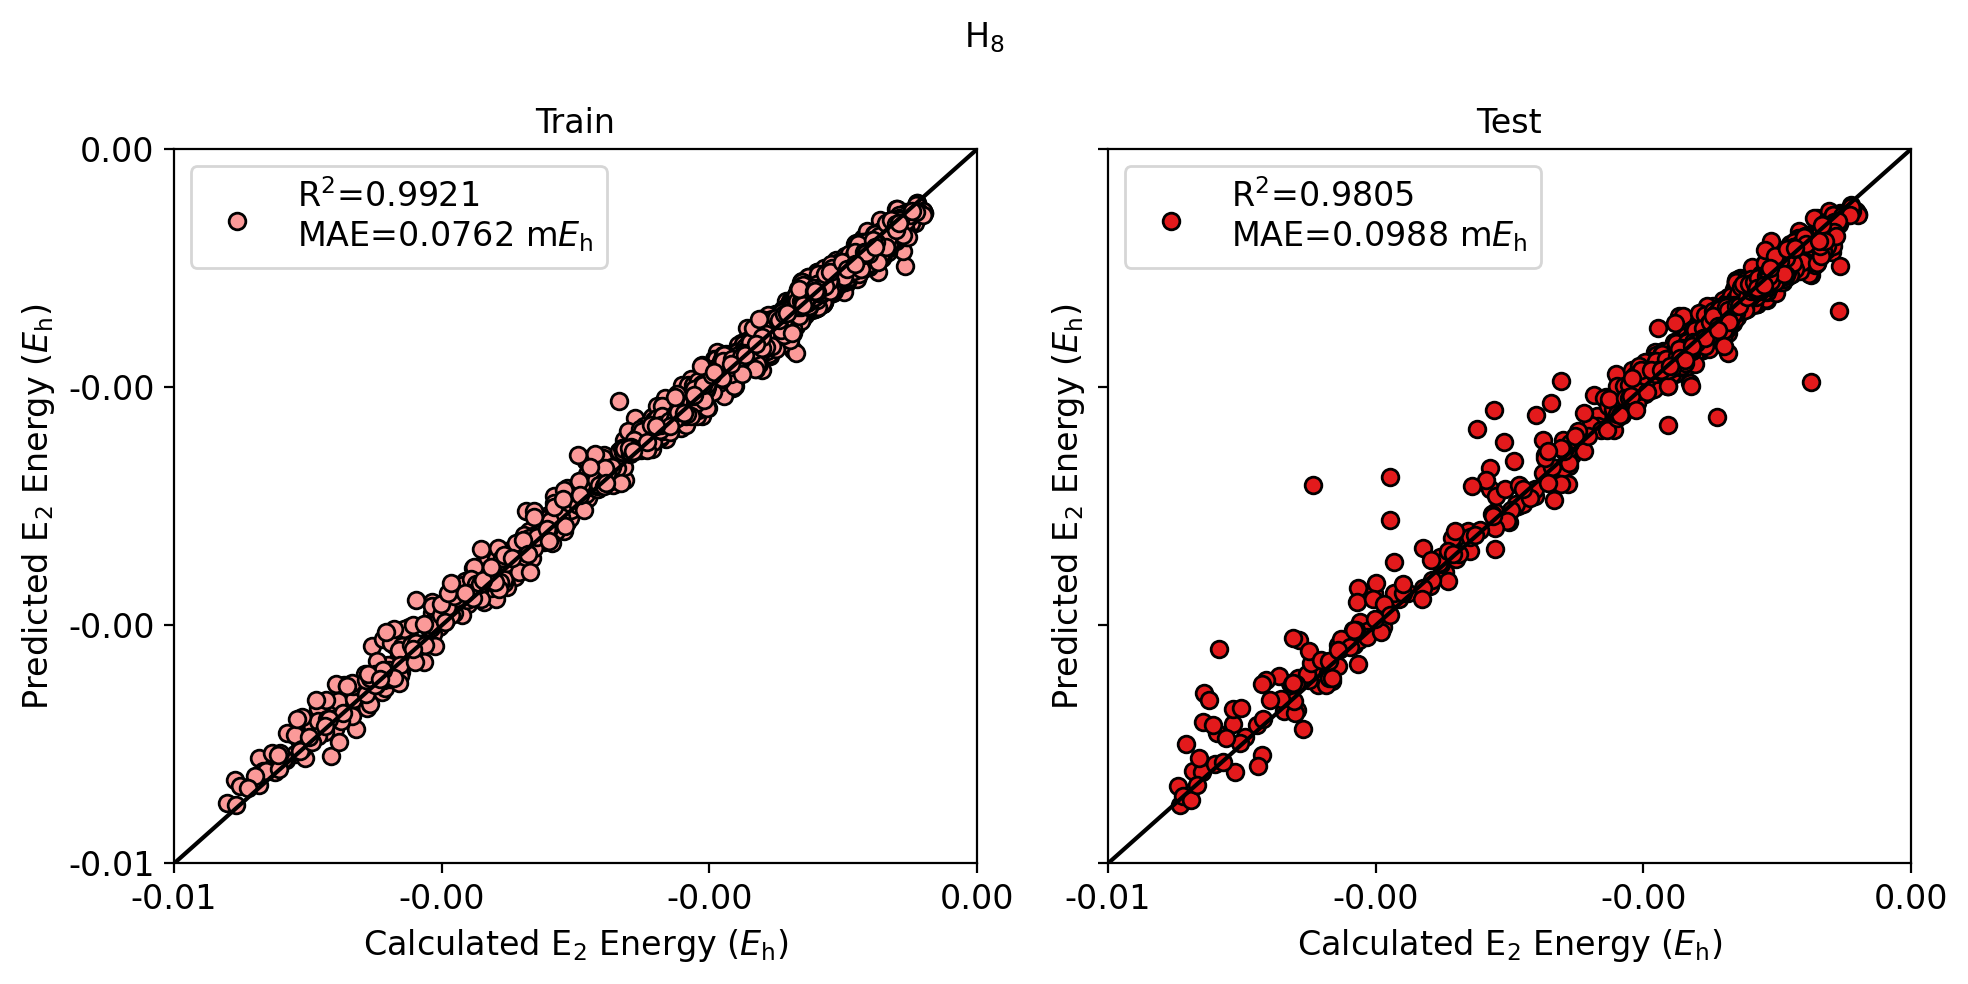

H10


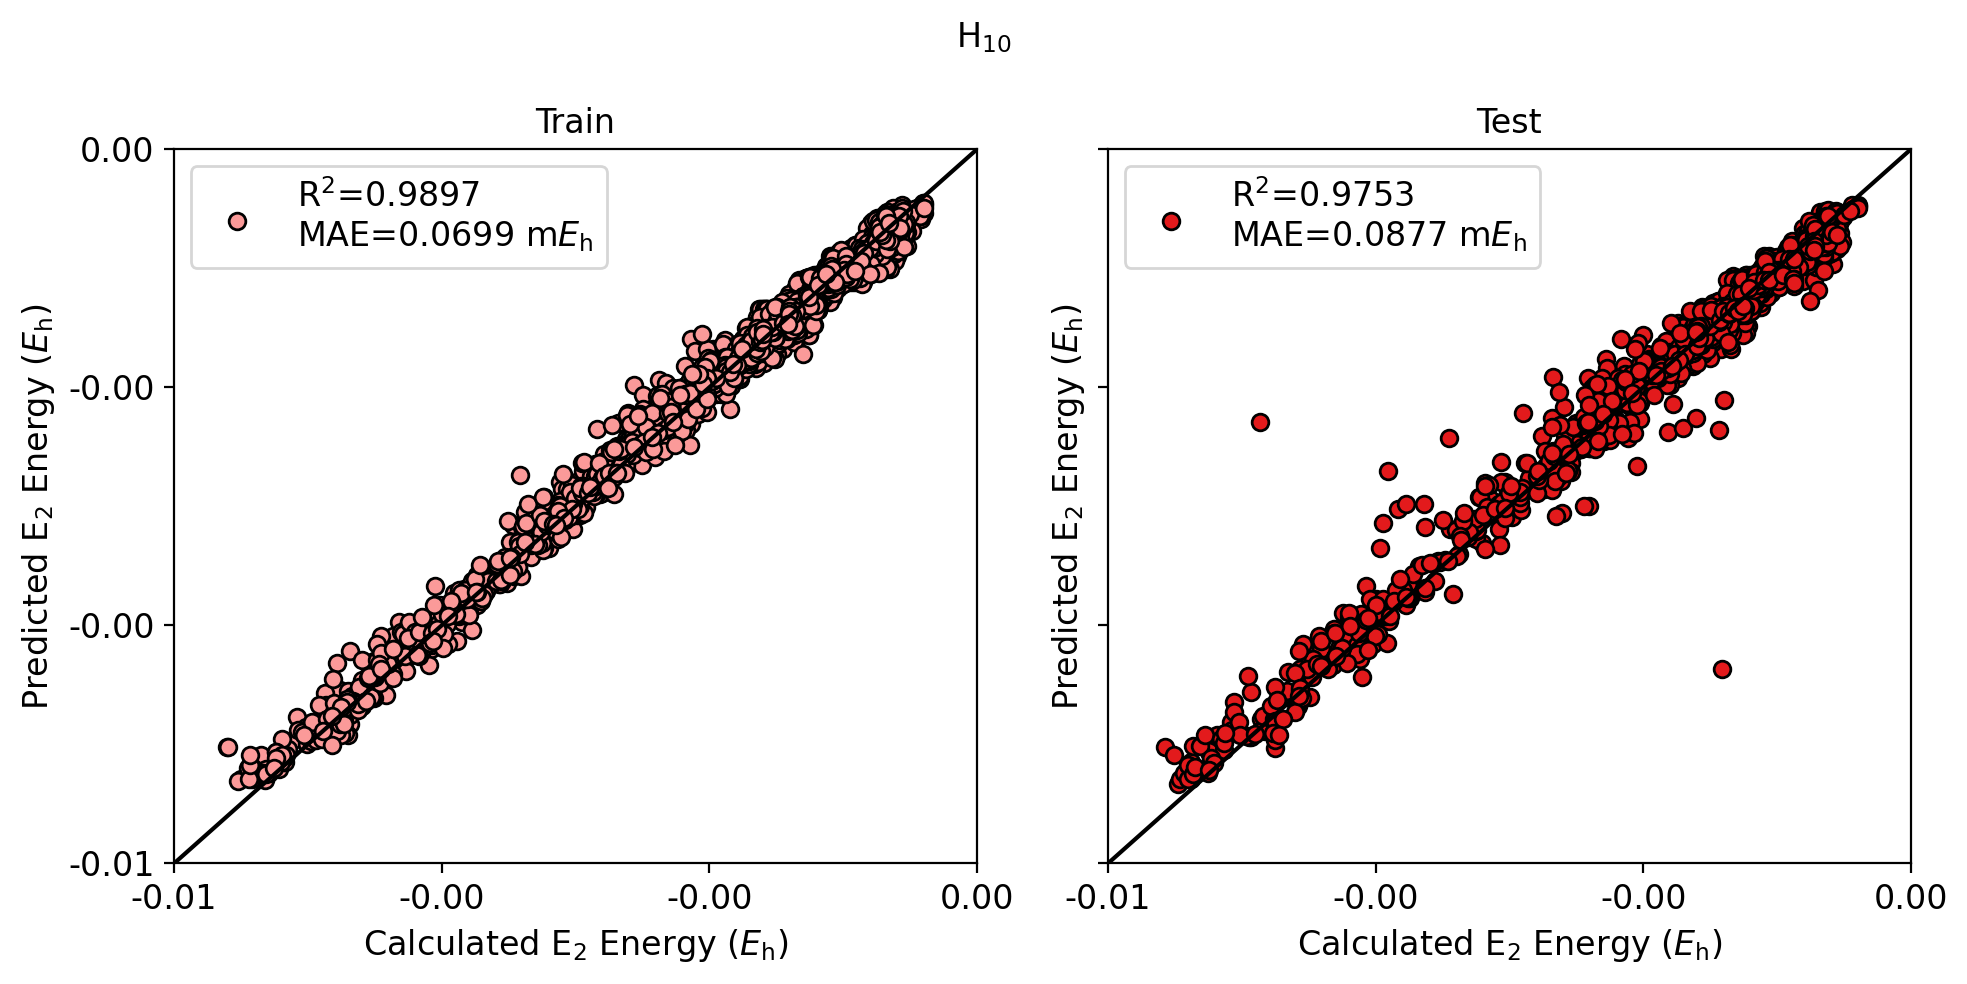

H12


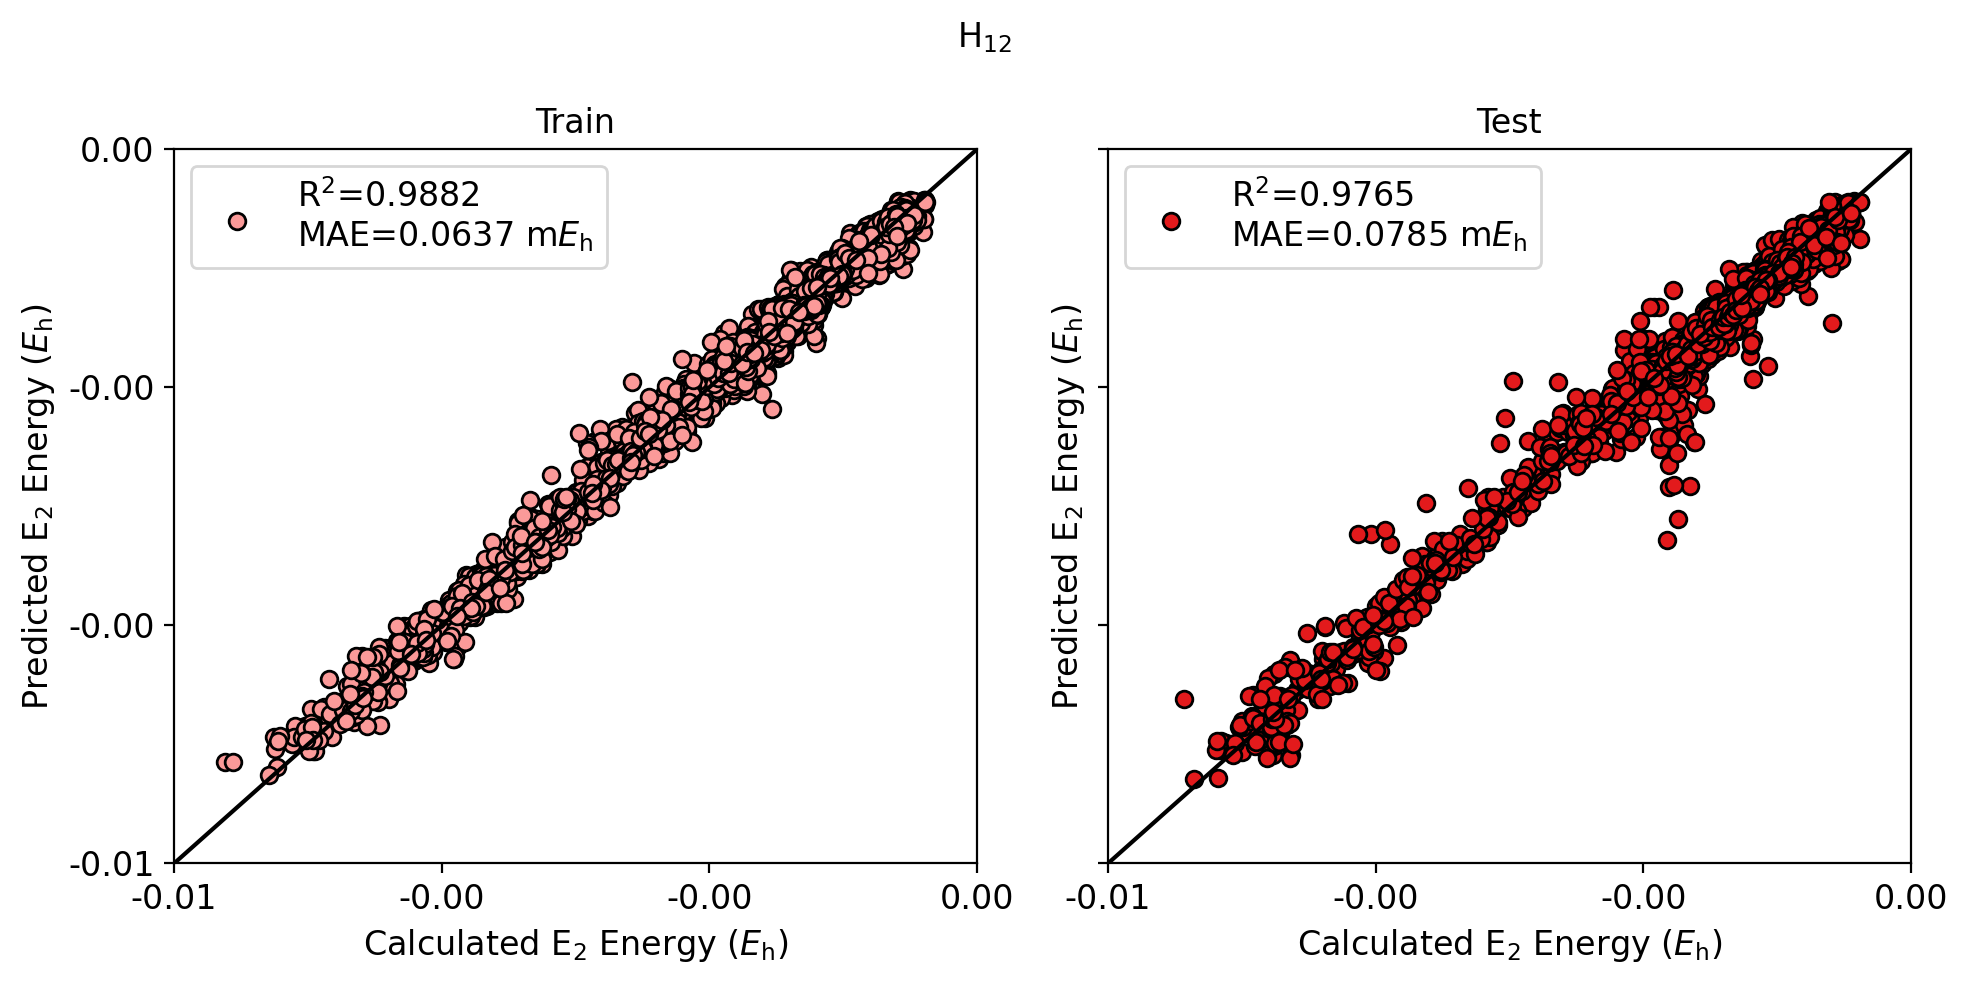

In [32]:
trainpairdf = pd.DataFrame(recover_train_list)
testpairdf = pd.DataFrame(recover_test_list)
pairerr={}
for n in sorted(set(traincaspt2melt['H$_{2n}$']),key=lambda x: int(x.replace("H",''))):
    print(n)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
    
    truetrainpair, predtrainpair = np.hstack(trainpairdf[trainpairdf[0]==n][2]),np.hstack(trainpairdf[trainpairdf[0]==n][3])
    train_r2_pair = r2_score(truetrainpair, predtrainpair)
    train_mae_pair = 1e3*mean_absolute_error(truetrainpair, predtrainpair)
    ax1.scatter(truetrainpair, predtrainpair,label='R$^{2}$='+f'{train_r2_pair:.4f}\nMAE={train_mae_pair:.4f}'+" m$E_{\mathrm{h}}$",color=pairedcp[4],edgecolors='k')
    ax1.plot(np.arange(-1000,1000),np.arange(-1000,1000),'k')
    ax1.set_xlabel('Calculated E$_2$ Energy ($E_{\mathrm{h}}$)')
    ax1.set_ylabel('Predicted E$_2$ Energy ($E_{\mathrm{h}}$)')
    ax1.set_title('Train')    
    ax1.legend()  
    
    truetestpair, predtestpair = np.hstack(testpairdf[testpairdf[0]==n][2]),np.hstack(testpairdf[testpairdf[0]==n][3])
    test_r2_pair = r2_score(truetestpair, predtestpair)
    test_mae_pair = 1e3*mean_absolute_error(truetestpair, predtestpair)
    ax2.scatter(truetestpair, predtestpair,label='R$^{2}$='+f'{test_r2_pair:.4f}\nMAE={test_mae_pair:.4f}'+" m$E_{\mathrm{h}}$",color=pairedcp[5],edgecolors='k')
    ax2.set_xlabel('Calculated E$_2$ Energy ($E_{\mathrm{h}}$)')
    ax2.plot(np.arange(-1000,1000),np.arange(-1000,1000),'k')
    ax2.set_ylabel('Predicted E$_2$ Energy ($E_{\mathrm{h}}$)')
    ax2.set_title('Test')    
    ax2.legend()  

    mincorr, maxcorr= np.hstack([truetrainpair,truetestpair]).min(), np.hstack([truetrainpair,truetestpair]).max()
    pct=0.50
    bufferbot, buffertop = mincorr*pct, maxcorr*pct

    # if 'H' in n:
    bottom, top = mincorr-buffertop, maxcorr+buffertop
    
    # else:
    #     bottom, top = mincorr+-0.1, maxcorr+0.05

    ax1.set_xlim(bottom,top)
    ax1.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])
    ax1.set_ylim(bottom,top)
    ax1.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_xlim(bottom,top)
    ax2.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_ylim(bottom,top)
    ax2.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])  
    
    fig.suptitle("H$_{"+re.findall(r'\d+',n)[0]+"}$")
    plt.tight_layout()
    plt.savefig(f'images/{n}_E2.png',dpi=300,bbox_inches='tight')    
    plt.show()
    pairerr[n] = {"r2_train":train_r2_pair,"r2_test":test_r2_pair,"mae_train":train_mae_pair,"mae_test":test_mae_pair}

In [33]:
traincorrdf = pd.DataFrame.from_dict(traincorrerr).loc[['mae_train','mae_test']].T
traincorrdf = traincorrdf.div([int(i.strip('H')) for i in traincorrdf.index], axis=0)

pairerrdf = pd.DataFrame.from_dict(pairerr).loc[['mae_train','mae_test']].T
pairerrdf = pairerrdf.div([int(i.strip('H')) for i in pairerrdf.index], axis=0)

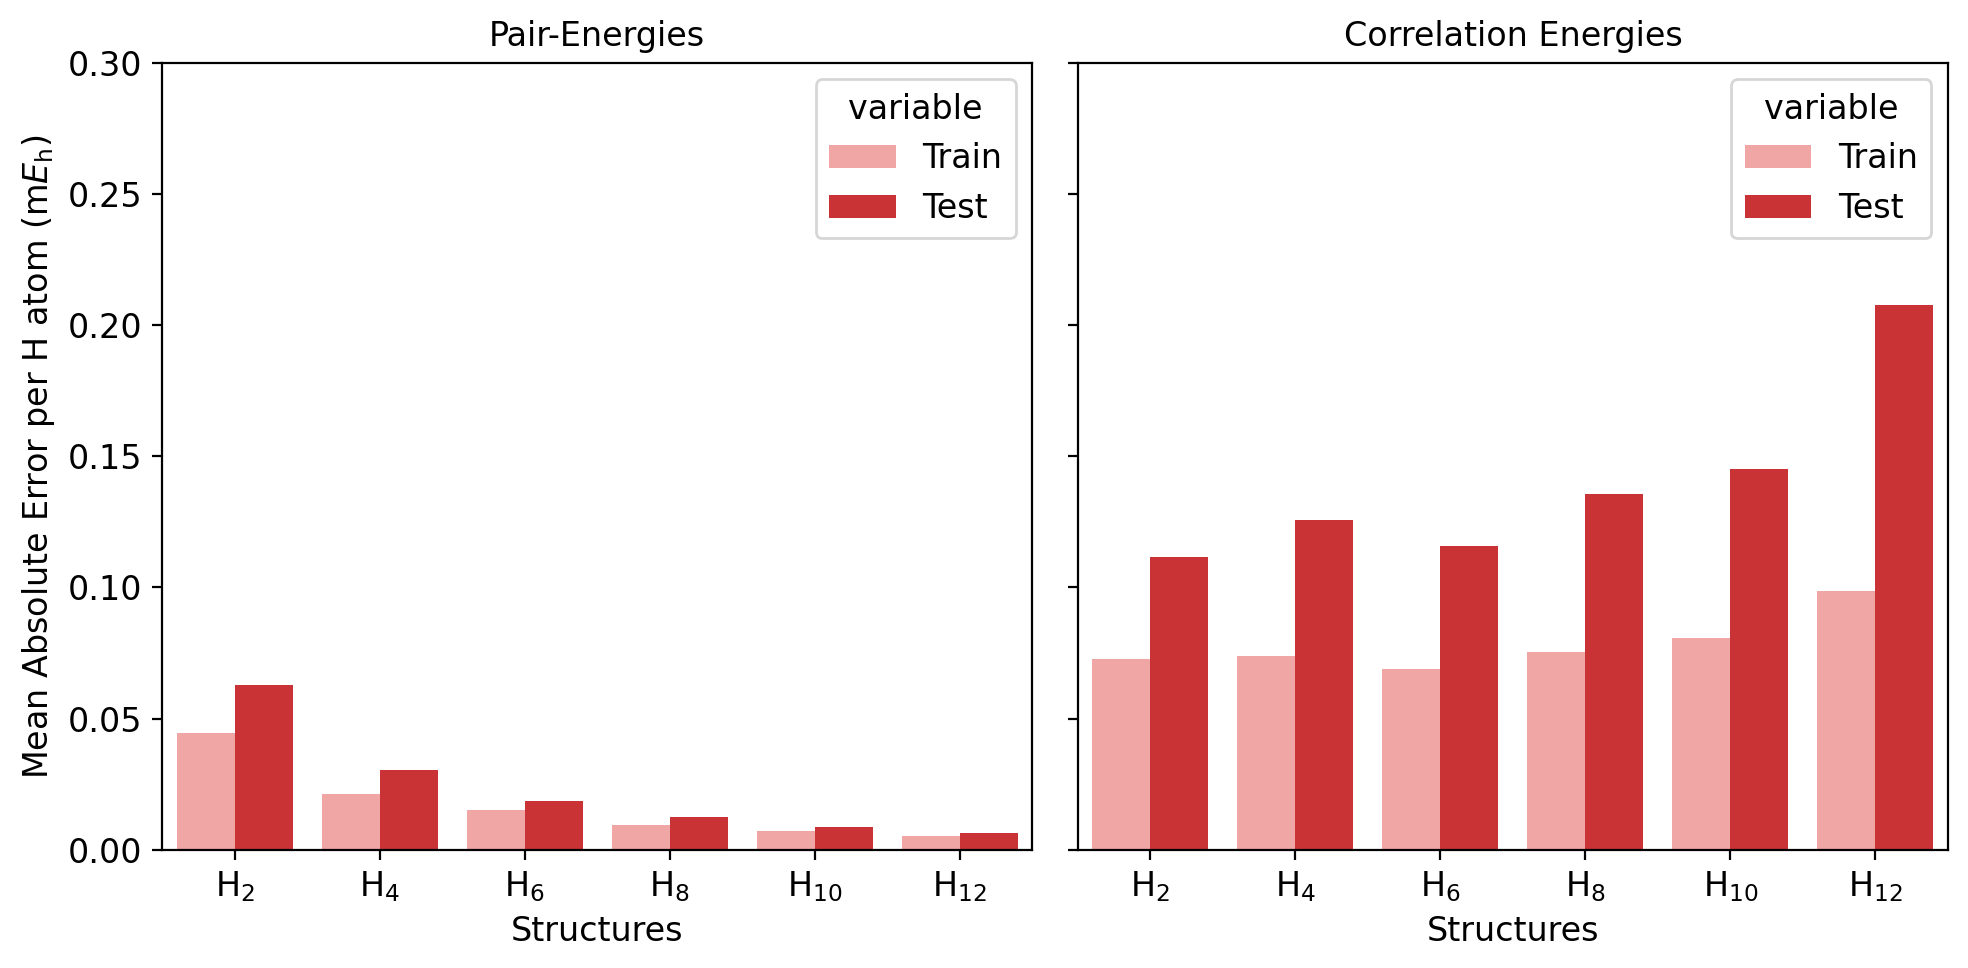

In [34]:
meltcorrerr = traincorrdf.rename(columns={'mae_train':'Train','mae_test':'Test'}).reset_index().melt(id_vars=['index'], value_vars=['Train','Test'])
meltcorrerr['index'] = ['H$_{2}$', 'H$_{4}$', 'H$_{6}$', 'H$_{8}$', 'H$_{10}$', 'H$_{12}$', 'H$_{2}$', 'H$_{4}$', 'H$_{6}$', 'H$_{8}$', 'H$_{10}$', 'H$_{12}$']
meltpairerr = pairerrdf.rename(columns={'mae_train':'Train','mae_test':'Test'}).reset_index().melt(id_vars=['index'], value_vars=['Train','Test'])
meltpairerr['index'] = ['H$_{2}$', 'H$_{4}$', 'H$_{6}$', 'H$_{8}$', 'H$_{10}$', 'H$_{12}$', 'H$_{2}$', 'H$_{4}$', 'H$_{6}$', 'H$_{8}$', 'H$_{10}$', 'H$_{12}$']
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
sns.barplot(data=meltpairerr,x='index',y='value',hue='variable',palette=pairedcp[4:6],ax=ax1)
ax1.set_ylabel('Mean Absolute Error per H atom (m$E_{\mathrm{h}}$)')
ax1.set_xlabel('Structures')
ax1.set_title('Pair-Energies')
ax1.set_ylim(0,0.3)
sns.barplot(data=meltcorrerr,x='index',y='value',hue='variable',palette=pairedcp[4:6],ax=ax2)
# ax2.set_ylabel('Mean Absolute Error (m$E_{\mathrm{h}}$)')
ax2.set_ylabel('')
# ax2.set_ylim(0,3)
ax2.set_xlabel('Structures')
ax2.set_title('Correlation Energies')

plt.tight_layout()
plt.savefig('images/MAE_bar.png',dpi=300,bbox_inches='tight')
plt.show()

In [35]:
meltcorrerr.to_excel('meltcorrMAE.xlsx')
meltpairerr.to_excel('meltpairMAE.xlsx')

In [ ]:
# import shap
# explainer = shap.Explainer(model.predict, X_test)
# shap_values = explainer(X_test)

# dffeat=pd.DataFrame(shap_values.abs.values.mean(axis=0),index=train_df.drop(columns=['Pair_Energies']).columns,columns=['shap']).rename(index={'1':'$\mathbf{b}$'}).reset_index().rename(columns={'index':'feat'}).sort_index().sort_values(by=['shap','feat'],ascending=False)
# # dffeat['rename']=len(dffeat)*[1]

# dffeat.to_excel('Hn_SHAP.xlsx')
dffeat = pd.read_excel('Hn_SHAP.xlsx')

In [ ]:
dffeat.sort_values(by='shap').iloc[:10]

In [ ]:
# with open('feature_names.txt','w') as f:
#     for i in dffeat['feat'].values:
#         f.write(i+'\n')

# with open('feature_names.txt','w') as f:
#     for i in dffeat['feat'].values:
#         f.write(i+'\n')

In [ ]:
# color_map=sns.color_palette('rocket',6)
# fontsize = 12
# fig, ax = plt.subplots(1,3,figsize=(15,12))
# for idx, i in enumerate([[ 0,  32], [42,  64], [64, 96]]):
#     print(idx,i)
#     feat_1 = dffeat.iloc[i[0]:i[1]]
#     ax[idx]=feat_1.sort_values(by=['shap','feat']).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax[idx])
#     ax[idx].bar_label(ax[idx].containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
#     ax[idx].set_xlim(0,5e-4)
#     ax[idx].set_xticks(np.linspace(0,5e-4,4),[f"{i:.2e}" for i in np.linspace(0,5e-4,4)])
#     ax[idx].set_ylabel('Features',fontsize=fontsize)
#     ax[idx].set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

# fig.subplots_adjust(wspace=0, hspace=0)

# plt.tight_layout()
# plt.savefig('images/Hn_shap_bar.png',dpi=300, bbox_inches='tight')
# plt.show()

color_map=sns.color_palette('rocket',6)
fontsize = 12
fig, ax = plt.subplots(1,3,figsize=(15,12))
for idx, i in enumerate([[ 0,  35], [35,  70], [70, 105]]):
    print(idx,i)
    feat_1 = dffeat.iloc[i[0]:i[1]]
    ax[idx]=feat_1.sort_values(by=['shap','feat']).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax[idx])
    ax[idx].bar_label(ax[idx].containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
    ax[idx].set_xlim(0,5e-4)
    ax[idx].set_xticks(np.linspace(0,5e-4,4),[f"{i:.2e}" for i in np.linspace(0,5e-4,4)])
    ax[idx].set_ylabel('Features',fontsize=fontsize)
    ax[idx].set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

fig.subplots_adjust(wspace=0, hspace=0)

plt.tight_layout()
# plt.savefig('images/Hn_shap_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
fontsize = 16
pd.concat([dffeat.sort_values(by='shap').iloc[0:10],dffeat.sort_values(by='shap').iloc[-10:]]).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax)
ax.bar_label(ax.containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
top_max = 4e-4
ax.set_xlim(0,top_max)
ax.set_xticks(np.linspace(0,top_max,4),[f"{i:.2e}" for i in np.linspace(0,top_max,4)])
ax.set_ylabel('Features',fontsize=fontsize)
ax.set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

fig.subplots_adjust(wspace=0, hspace=0)

plt.tight_layout()
plt.savefig('images/minmax_Hn_shap_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.gridspec as gridspec

# Assuming you already have dffeat and color_map defined
top10 = dffeat.sort_values(by='shap', ascending=True).iloc[-10:]
bottom10 = dffeat.sort_values(by='shap', ascending=True).iloc[:10]

fontsize = 16
top_max = 4e-4

# Create a figure with two subplots, sharing x-axis
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.05)
ax_top = fig.add_subplot(gs[0])
ax_bot = fig.add_subplot(gs[1], sharex=ax_top)

# Plot top 10
top10.plot.barh(x='feat', y='shap', ax=ax_top, legend=False, color=color_map[3], fontsize=fontsize)
ax_top.bar_label(ax_top.containers[0], fmt='%.4e', fontsize=fontsize, padding=1)

# Plot bottom 10
bottom10.plot.barh(x='feat', y='shap', ax=ax_bot, legend=False, color=color_map[3], fontsize=fontsize)
ax_bot.bar_label(ax_bot.containers[0], fmt='%.4e', fontsize=fontsize, padding=1)

# Hide x-axis labels on top plot
plt.setp(ax_top.get_xticklabels(), visible=False)
ax_top.set_xlabel("")
ax_bot.set_xlabel('mean(|SHAP value|)', fontsize=fontsize)

# Y labels
ax_top.set_ylabel('Top 10 Features', fontsize=fontsize)
ax_bot.set_ylabel('Bottom 10 Features', fontsize=fontsize)

# Shared limits and ticks
ax_top.set_xlim(0, top_max)
ax_bot.set_xlim(0, top_max)
ax_bot.set_xticks(np.linspace(0, top_max, 4))
ax_bot.set_xticklabels([f"{i:.2e}" for i in np.linspace(0, top_max, 4)], fontsize=fontsize)

# Add axis break indicators (diagonal lines)
d = .005  # size of diagonal lines in axes coordinates
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax_bot.transAxes)
ax_bot.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax_bot.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.tight_layout()
plt.savefig('images/minmax_Hn_shap_bar.png',dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
for f in dffeat.sort_values(by='shap').iloc[0:10]['feat']:
    try:
        sns.histplot(pd.concat([train_df,test_df])[f])
    except:
        sns.histplot(pd.concat([train_df,test_df])['1'])
    plt.title(f)
    plt.show()

In [ ]:
# # plt.figure(figsize=(8,13))
# color_map=sns.color_palette('rocket',6)
# fontsize = 5

# feat_2 = dffeat.sort_values(by=['shap','feat']).iloc[:63]
# feat_1 = dffeat.sort_values(by=['shap','feat']).iloc[63:]


# ax1=feat_1.sort_values(by=['shap','feat']).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax1)
# ax1.bar_label(ax1.containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
# ax1.set_xlim(0,5e-4)
# ax1.set_xticks(np.linspace(0,5e-4,4),[f"{i:.2e}" for i in np.linspace(0,5e-4,4)])
# ax1.set_ylabel('Features',fontsize=fontsize)
# ax1.set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

# ax2=feat_2.sort_values(by=['shap','feat']).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax2)
# ax2.bar_label(ax2.containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
# ax2.set_xlim(0,5e-4)
# ax2.set_xticks(np.linspace(0,5e-4,4),[f"{i:.2e}" for i in np.linspace(0,5e-4,4)])
# ax2.set_ylabel('')
# ax2.set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

# plt.tight_layout()
# # os.mkdir('images')
# plt.savefig('images/Hn_shap_bar.png',dpi=300, bbox_inches='tight')
# plt.show()



In [ ]:
traincorrE2.columns

In [ ]:
r2_score(traincorrE2['E$_{2}^{\text{Calculated}}$'],traincorrE2['E$_{2}^{\text{Predicted}}$'])

In [ ]:
mean_absolute_error(traincorrE2['E$_{2}^{\text{Calculated}}$'],traincorrE2['E$_{2}^{\text{Predicted}}$'])*1e3

In [ ]:
r2_score(testcorrE2['E$_{2}^{\text{Calculated}}$'],testcorrE2['E$_{2}^{\text{Predicted}}$'])

In [ ]:
mean_absolute_error(testcorrE2['E$_{2}^{\text{Calculated}}$'],testcorrE2['E$_{2}^{\text{Predicted}}$'])*1e3

In [ ]:
r2_score(traincorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])

In [ ]:
r2_score(testcorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])

In [ ]:
mean_absolute_error(traincorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

In [ ]:
mean_absolute_error(testcorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3